In [1]:
library("devtools")
library(forcats)
library(tidyverse)
library(ggrepel)
library(dplyr)



Loading required package: usethis

Warning message:
“package ‘ggplot2’ was built under R version 4.2.1”
Warning message:
“package ‘tibble’ was built under R version 4.2.1”
── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2.9000 ──
✔ dplyr     1.0.10     ✔ readr     2.1.4 
✔ ggplot2   3.3.6      ✔ stringr   1.5.0 
✔ lubridate 1.9.2      ✔ tibble    3.1.8 
✔ purrr     0.3.5      ✔ tidyr     1.2.1 
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
sb_metadata <- read_delim("/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/sb_annot_v4/Sb.leaf_annot.V4.meta.final.2022-11-14.txt")
zm_metadata <- read_delim("/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/Zm_annot_v4/Zm.leaf_annot.V4.meta.final.txt")

Rows: 17215 Columns: 36
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (15): cellID, sampleID, d.type, LouvainCluster_t, louvain_clusters_sub, ...
dbl (21): total, tss, acrs, ptmt, nSites, log10nSites, pTSS, FRiP, pOrg, tss...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 19218 Columns: 31
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (9): cellID, sampleID, d.type, Zm_v4_annot, Zm_v4_annot.subcluster_anno...
dbl (22): total, tss, acrs, ptmt, nSites, log10nSites, pTSS, FRiP, pOrg, tss...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quie

In [3]:
sb_acr_number <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/Sb.cts_peaks.txt", delim=" ")
zm_acr_number <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/Zm.cts_peaks.txt", delim=" ")



Rows: 11 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: " "
chr (2): species, cell_type
dbl (1): acr_number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 13 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: " "
chr (2): species, cell_type
dbl (1): acr_number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
zm_metadata$Zm_v4_annot

[1] "epidermis"               "ground_meristem"        
    [3] "epidermis"               "ground_meristem"        
    [5] "epidermis"               "epidermis"              
    [7] "ground_meristem"         "companion_cells"        
    [9] "mesophyll"               "ground_meristem"        
   [11] "ground_meristem"         "mesophyll"              
   [13] "sieve_elements"          "ground_meristem"        
   [15] "ground_meristem"         "bundle_sheath"          
   [17] "bundle_sheath"           "ground_meristem"        
   [19] "ground_meristem"         "epidermis"              
   [21] "epidermis"               "epidermis"              
   [23] "ground_meristem"         "bundle_sheath"          
   [25] "mesophyll"               "companion_cells"        
   [27] "mesophyll"               "epidermis"              
   [29] "sieve_elements"          "ground_meristem"        
   [31] "sieve_elements"          "epidermis"              
   [33] "sieve_elements"          "unknown"                
   [35] "mesophyll"               "mesophyll"              
   [37] "epidermis"               "bundle_sheath"          
   [39] "epidermis"               "protoderm"              
   [41] "bundle_sheath"           "ground_meristem"        
   [43] "mesophyll"               "bundle_sheath"          
   [45] "companion_cells"         "ground_meristem"        
   [47] "ground_meristem"         "bundle_sheath"          
   [49] "subsidiary_mother_cells" "ground_meristem"        
   [51] "ground_meristem"         "mesophyll"              
   [53] "mesophyll"               "ground_meristem"        
   [55] "mesophyll"               "companion_cells"        
   [57] "ground_meristem"         "epidermis"              
   [59] "bundle_sheath"           "mesophyll"              
   [61] "sieve_elements"          "bundle_sheath"          
   [63] "ground_meristem"         "ground_meristem"        
   [65] "ground_meristem"         "bundle_sheath"          
   [67] "ground_meristem"         "epidermis"              
   [69] "bundle_sheath"           "protoderm"              
   [71] "sieve_elements"          "ground_meristem"        
   [73] "bundle_sheath"           "developing_mesophyll"   
   [75] "ground_meristem"         "companion_cells"        
   [77] "mesophyll"               "mesophyll"              
   [79] "ground_meristem"         "mesophyll"              
   [81] "epidermis"               "bundle_sheath"          
   [83] "sieve_elements"          "ground_meristem"        
   [85] "mesophyll"               "ground_meristem"        
   [87] "sieve_elements"          "sieve_elements"         
   [89] "epidermis"               "bundle_sheath"          
   [91] "mesophyll"               "bundle_sheath"          
   [93] "bundle_sheath"           "bundle_sheath"          
   [95] "procambium"              "mesophyll"              
   [97] "mesophyll"               "mesophyll"              
   [99] "epidermis"               "mesophyll"              
  [101] "epidermis"               "ground_meristem"        
  [103] "companion_cells"         "bundle_sheath"          
  [105] "mesophyll"               "epidermis"              
  [107] "epidermis"               "epidermis"              
  [109] "sieve_elements"          "mesophyll"              
  [111] "epidermis"               "protoderm"              
  [113] "mesophyll"               "mesophyll"              
  [115] "sieve_elements"          "mesophyll"              
  [117] "epidermis"               "epidermis"              
  [119] "ground_meristem"         "mesophyll"              
  [121] "mesophyll"               "ground_meristem"        
  [123] "sieve_elements"          "mesophyll"              
  [125] "mesophyll"               "ground_meristem"        
  [127] "epidermis"               "mesophyll"              
  [129] "companion_cells"         "sieve_elements"         
  [131] "procambium"              "epidermis"              
  [133] "sieve_elements"          "protoderm

In [5]:
sb_summarised_celltype <- sb_metadata  %>% 
    group_by(sb_v4_annot)  %>% 
    summarise(ncell = n())  %>% 
    mutate(species = "sb")  %>% 
    left_join(., sb_acr_number, by = c("species" = "species", "sb_v4_annot" = "cell_type"))  %>% 
    rename("cell_type" = sb_v4_annot)

zm_summarised_celltype <- zm_metadata  %>% 
    group_by(Zm_v4_annot)  %>% 
    summarise(ncell = n())  %>% 
    mutate(species = "zm")  %>% 
    left_join(., zm_acr_number, by = c("species" = "species", "Zm_v4_annot" = "cell_type"))  %>% 
    rename("cell_type" = Zm_v4_annot)




`geom_smooth()` using formula 'y ~ x'



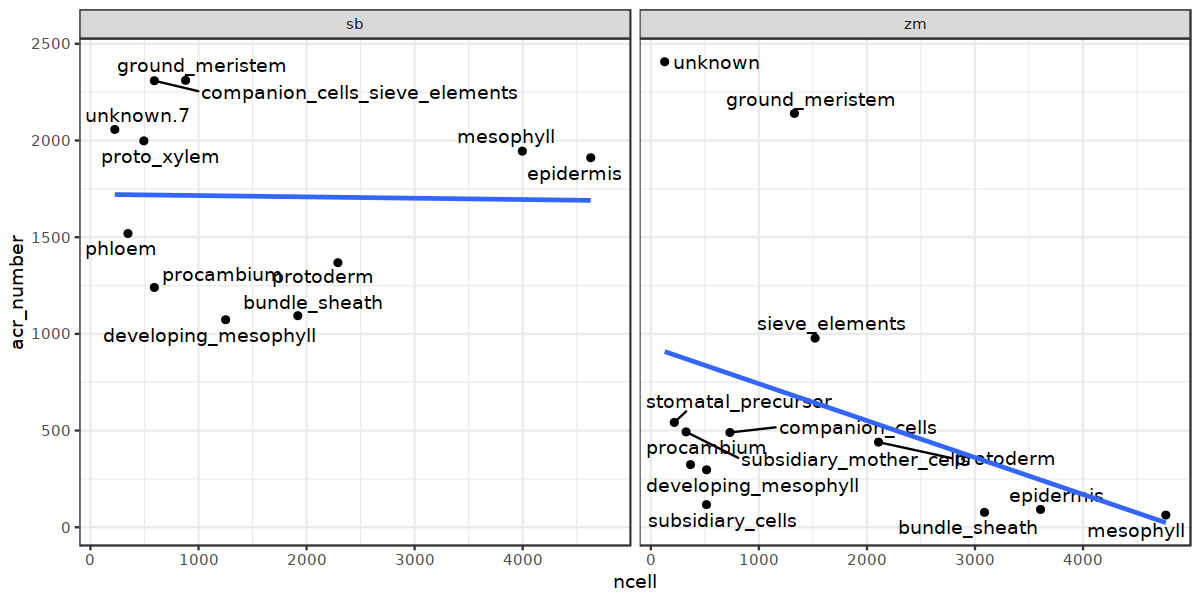

In [65]:
combined <- bind_rows(zm_summarised_celltype, sb_summarised_celltype)

¥
ggplot(combined, aes(ncell, acr_number, label=cell_type)) + geom_point() + 
facet_grid(.~species) + geom_text_repel() + geom_smooth(method = "lm", se = FALSE) + 
theme_bw()
 

In [7]:
# 2/9/2023
#Updated values after purguing small groups of cells in Zea mays


zm_updated_meta <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/Zm.leaf_annot.V4.meta.final.purged_small_groups.txt", delim="\t", col_names = TRUE)  %>% 
    group_by(Zm_v4_annot)  %>% 
    summarise(cell_counts = n())  %>% 
    mutate(species = "Zm")  %>% 
    rename("cell_type" = Zm_v4_annot)
sb_updated_meta <- read_delim("/home/jpm73279/Mendieta_et_al_comparative_single_cell/metrics/annotations/sb_annot_v4/Sb.leaf_annot.V4.meta.final.2022-11-14.txt", delim="\t", col_names = TRUE)  %>% 
    group_by(sb_v4_annot)  %>% 
    summarise(cell_counts = n())  %>% 
    mutate(species = "Sb")  %>% 
    rename(cell_type = sb_v4_annot)

merged_cell_number <- bind_rows(zm_updated_meta, sb_updated_meta)


bed_col_names <- c("chrom", "start", "stop", "acr_name", "pval")

sb_ctsacrs <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/Sb/Sb.V4_acr_classification.all_cts.ACRs.bed", delim="\t", col_names = bed_col_names,   col_types = "ccccc")  %>% 
    separate(acr_name, c("scACR", "cell_type"), sep = ";")  %>% 
    mutate(species = "Sb")

zm_ctsacrs <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/Zm/Zm.V4_acr_classification.all_cts.ACRs.bed", delim="\t", col_names = bed_col_names,col_types = "ccccc")  %>% 
    separate(acr_name, c("scACR", "cell_type"), sep = ";")  %>% 
    mutate(species = "Zm") 


Rows: 18547 Columns: 31
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (9): cellID, sampleID, d.type, Zm_v4_annot, Zm_v4_annot.subcluster_anno...
dbl (22): total, tss, acrs, ptmt, nSites, log10nSites, pTSS, FRiP, pOrg, tss...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 17215 Columns: 36
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (15): cellID, sampleID, d.type, LouvainCluster_t, louvain_clusters_sub, ...
dbl (21): total, tss, acrs, ptmt, nSites, log10nSites, pTSS, FRiP, pOrg, tss...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quie

In [8]:
combined_ctsACRs <- bind_rows(sb_ctsacrs, zm_ctsacrs)  %>% 
    group_by(species, cell_type)  %>% 
    summarise(scACR_count = n())

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.


In [9]:
combined_cell_number_acr_count <- left_join(merged_cell_number, combined_ctsACRs, by = c("species", "cell_type"))

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_text_repel).”


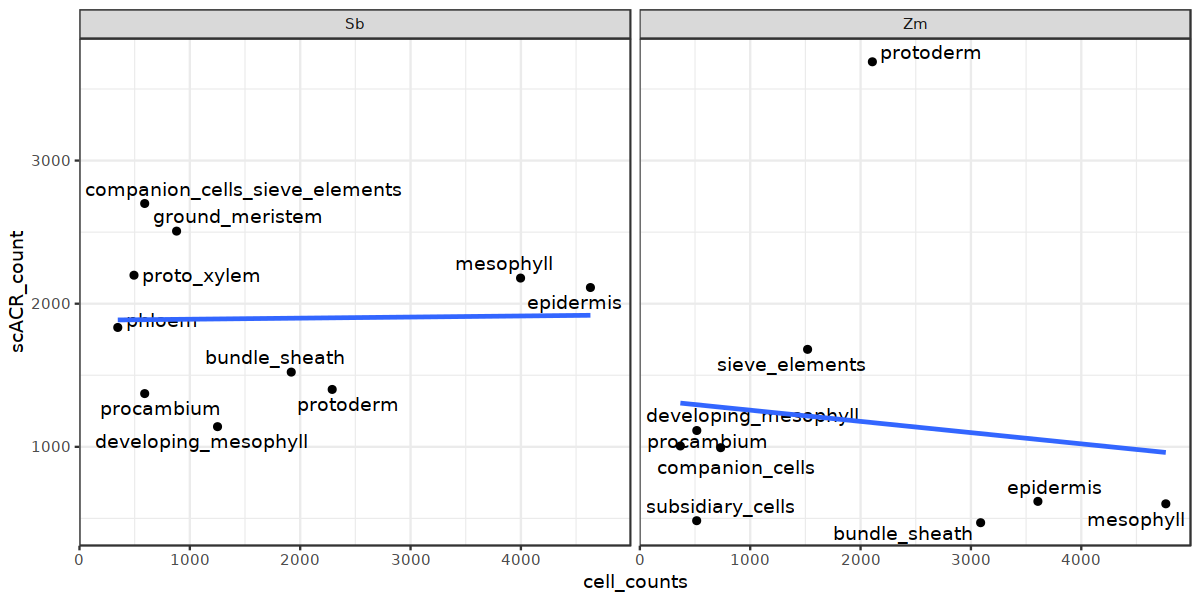

In [10]:

options(repr.plot.width=10, repr.plot.height=5)
ggplot(combined_cell_number_acr_count, aes(cell_counts, scACR_count, label=cell_type)) + geom_point() + 
facet_grid(.~species) + geom_text_repel() + geom_smooth(method = "lm", se = FALSE) + theme_bw()

In [11]:
calculate_totaol <- combined_ctsACRs  %>% 
    group_by(species)  %>% 
    summarise(total_ctsACRs = sum(scACR_count))


combined_acrs <-left_join(combined_ctsACRs, calculate_totaol, by = c("species"))  %>% 
    rowwise()  %>% 
    mutate(calculated_prop_of_cts = (scACR_count/total_ctsACRs) * 100)

combined_acrs

species,cell_type,scACR_count,total_ctsACRs,calculated_prop_of_cts
<chr>,<chr>,<int>,<int>,<dbl>
Sb,bundle_sheath,1522,18968,8.024040
Sb,companion_cells_sieve_elements,2700,18968,14.234500
Sb,developing_mesophyll,1141,18968,6.015394
Sb,epidermis,2113,18968,11.139814
Sb,ground_meristem,2507,18968,13.216997
Sb,mesophyll,2179,18968,11.487769
Sb,phloem,1834,18968,9.668916
Sb,procambium,1372,18968,7.233235
Sb,proto_xylem,2199,18968,11.593210


In [3]:

colors_large <- c("#DEA940","#A2A763","#D6EEBE","#5894D4","#6AAD51","#6C8686","#FFD92F", "#7f2201","#b53310",
                         "#E7673B","#FB9A99","#E31A1C","#FDBF6F","#CAB2D6","#386CB0","#FFFFB3", "#5dead5","#c11577",
                         "#CCCCCC", "#7570B3","#B15928", "#6A3D9A", "#d87c6a", "#0060e8", "#84c5ff", "#ffd460", "#d81397")


factor_order <- c("broadly_accessible",
                  'companion_cells_sieve_elements',
'companion_cells',
'sieve_elements',
'bundle_sheath',
'developing_mesophyll',
'epidermis',
'ground_meristem',
'mesophyll',
'phloem',
'procambium',
'proto_xylem',
'protoderm',
'subsidiary_cells')




Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning message:
“1 unknown level in `f`: broadly_accessible”
Warning 

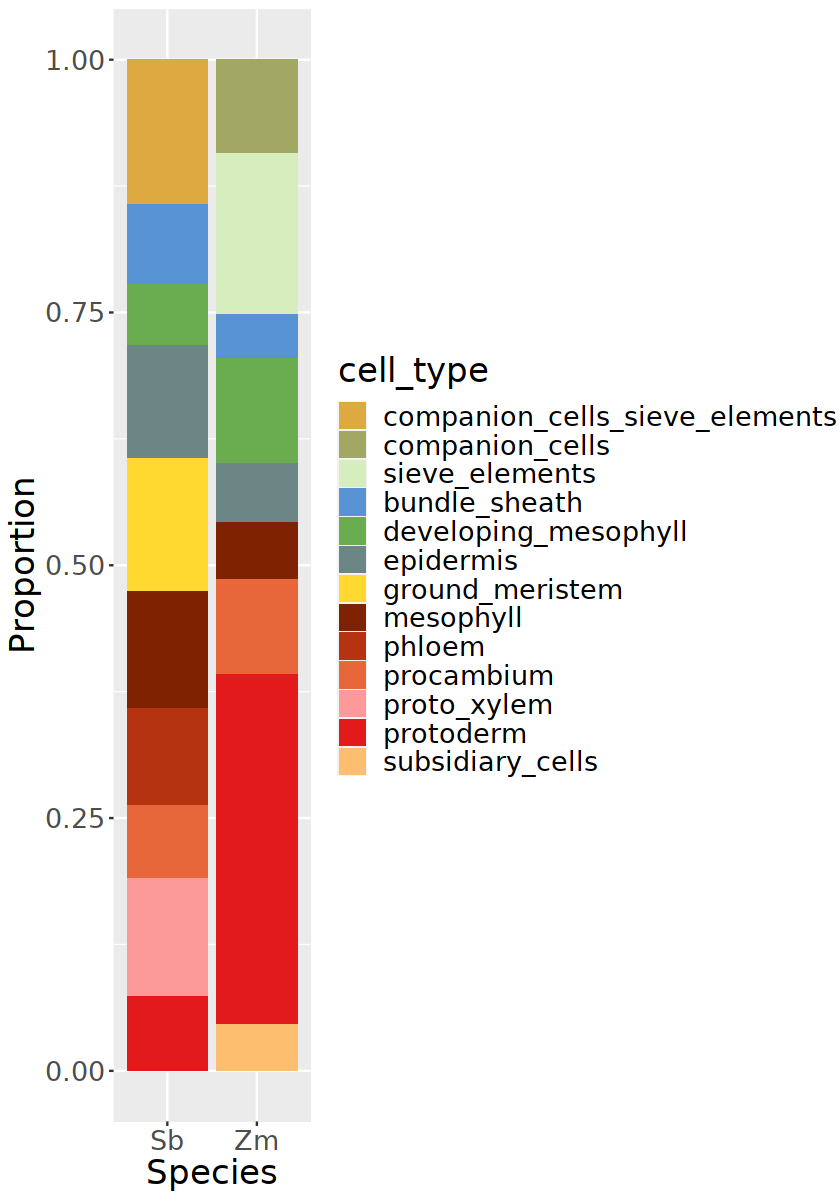

In [13]:


cell_type_order <- 
options(repr.plot.width=7, repr.plot.height=10)
# Stacked + percent
prop_ct_acrs_by_ct <- combined_acrs  %>% 
    dplyr::filter(is.na(cell_type) != TRUE)  %>%  
    mutate_at(vars(cell_type), 
            list(factor))  %>% 
    mutate(cell_type = forcats::fct_relevel(cell_type, factor_order)) %>%

    ggplot(., aes(fill=cell_type, y=scACR_count, x=species)) + 
        geom_bar(position="fill", stat="identity") + xlab("Species") + ylab("Proportion") +
        theme(text = element_text(size = 20)) 

prop_ct_acrs_by_ct + scale_fill_manual(values = colors_large)


In [14]:
# Proportion of total 

zm_broadly_accessible <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/Zm/Zm.V4_acr_classification.broadly_accessible.ACRs.bed", delim = "\t")  %>% 
    summarise(n_broad_acrs = n())  %>% 
    mutate(species = "Zm")


sb_broadly_accessible <- read_delim("/scratch/jpm73279/comparative_single_cell/dev_location/entropy_calc.CTs/R_implemenation_test/Sb/Sb.V4_acr_classification.broadly_accessible.ACRs.bed", delim = "\t")  %>% 
    summarise(n_broad_acrs = n())  %>% 
    mutate(species = "Sb")



broadly_acc_ACRs <- bind_rows(zm_broadly_accessible, sb_broadly_accessible)

cts_acrs_broadly <- left_join(combined_acrs, broadly_acc_ACRs, by = c("species"))


Rows: 59524 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): chr1, scACR_117;broadly_accessible
dbl (3): 34471, 34972, 6.812023615916376

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 51565 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chr01, scACR_2;broadly_accessible
dbl (3): 35037, 35538, 40.54185693120357

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
final_merged <- cts_acrs_broadly  %>% 
    rowwise()  %>% 
    mutate(total_ACRs = n_broad_acrs + total_ctsACRs)  %>% 
    select(species, total_ctsACRs, n_broad_acrs)  %>% 
    unique()


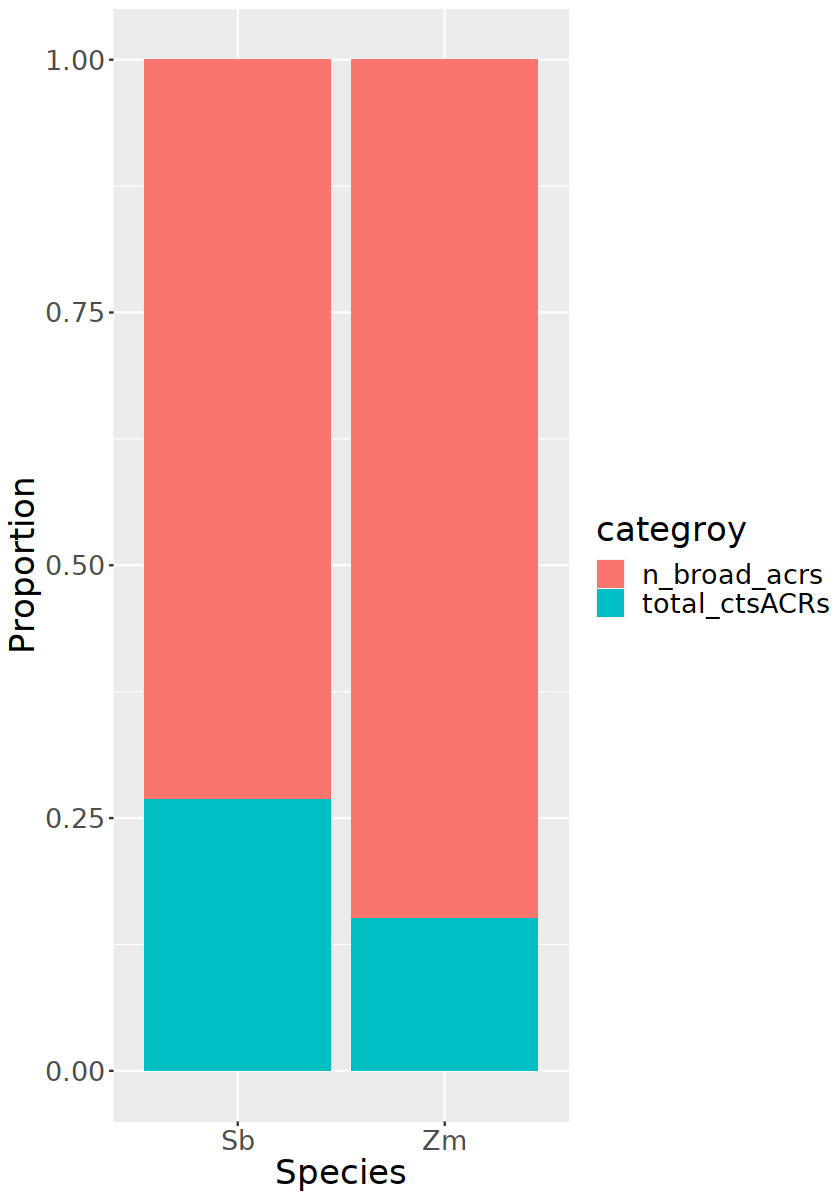

In [16]:
x <- pivot_longer(final_merged, cols = c("total_ctsACRs", "n_broad_acrs"), names_to = "categroy", values_to = "counts")

options(repr.plot.width=7, repr.plot.height=10)
# Stacked + percent
ggplot(x, aes(fill=categroy, y=counts, x=species)) + 
    geom_bar(position="fill", stat="identity") + xlab("Species") + ylab("Proportion") +
    theme(text = element_text(size = 20))


In [17]:
zm_Frip <- zm_metadata  %>% 
    ggplot(., aes(x = Zm_v4_annot, y = FRiP)) + geom_violin() +
    theme(text = element_text(size = 20)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))  + 
  stat_summary(fun.data = "mean_cl_boot", geom = "pointrange",
               colour = "red")

zm_total <- zm_metadata  %>% 
    ggplot(., aes(x = Zm_v4_annot, y = log(total))) + geom_violin() +
    theme(text = element_text(size = 20)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
  stat_summary(fun.data = "mean_cl_boot", geom = "pointrange",
               colour = "red")


zm_ptmt <- zm_metadata  %>% 
    dplyr::filter(Zm_v4_annot != "ground_meristem")  %>% 
    ggplot(., aes(x = Zm_v4_annot, y = acrs)) + geom_violin() +
    theme(text = element_text(size = 20)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
  stat_summary(fun.data = "mean_cl_boot", geom = "pointrange",
               colour = "red")


 

In [18]:
zm_metadata  %>% 
    group_by(Zm_v4_annot)  %>% 
    summarise(total_reads = sum(total))

Zm_v4_annot,total_reads
<chr>,<dbl>
bundle_sheath,12212030
companion_cells,2470434
developing_mesophyll,1626145
epidermis,12468087
ground_meristem,11231908
mesophyll,14545787
procambium,1172981
protoderm,8799512
sieve_elements,4677912


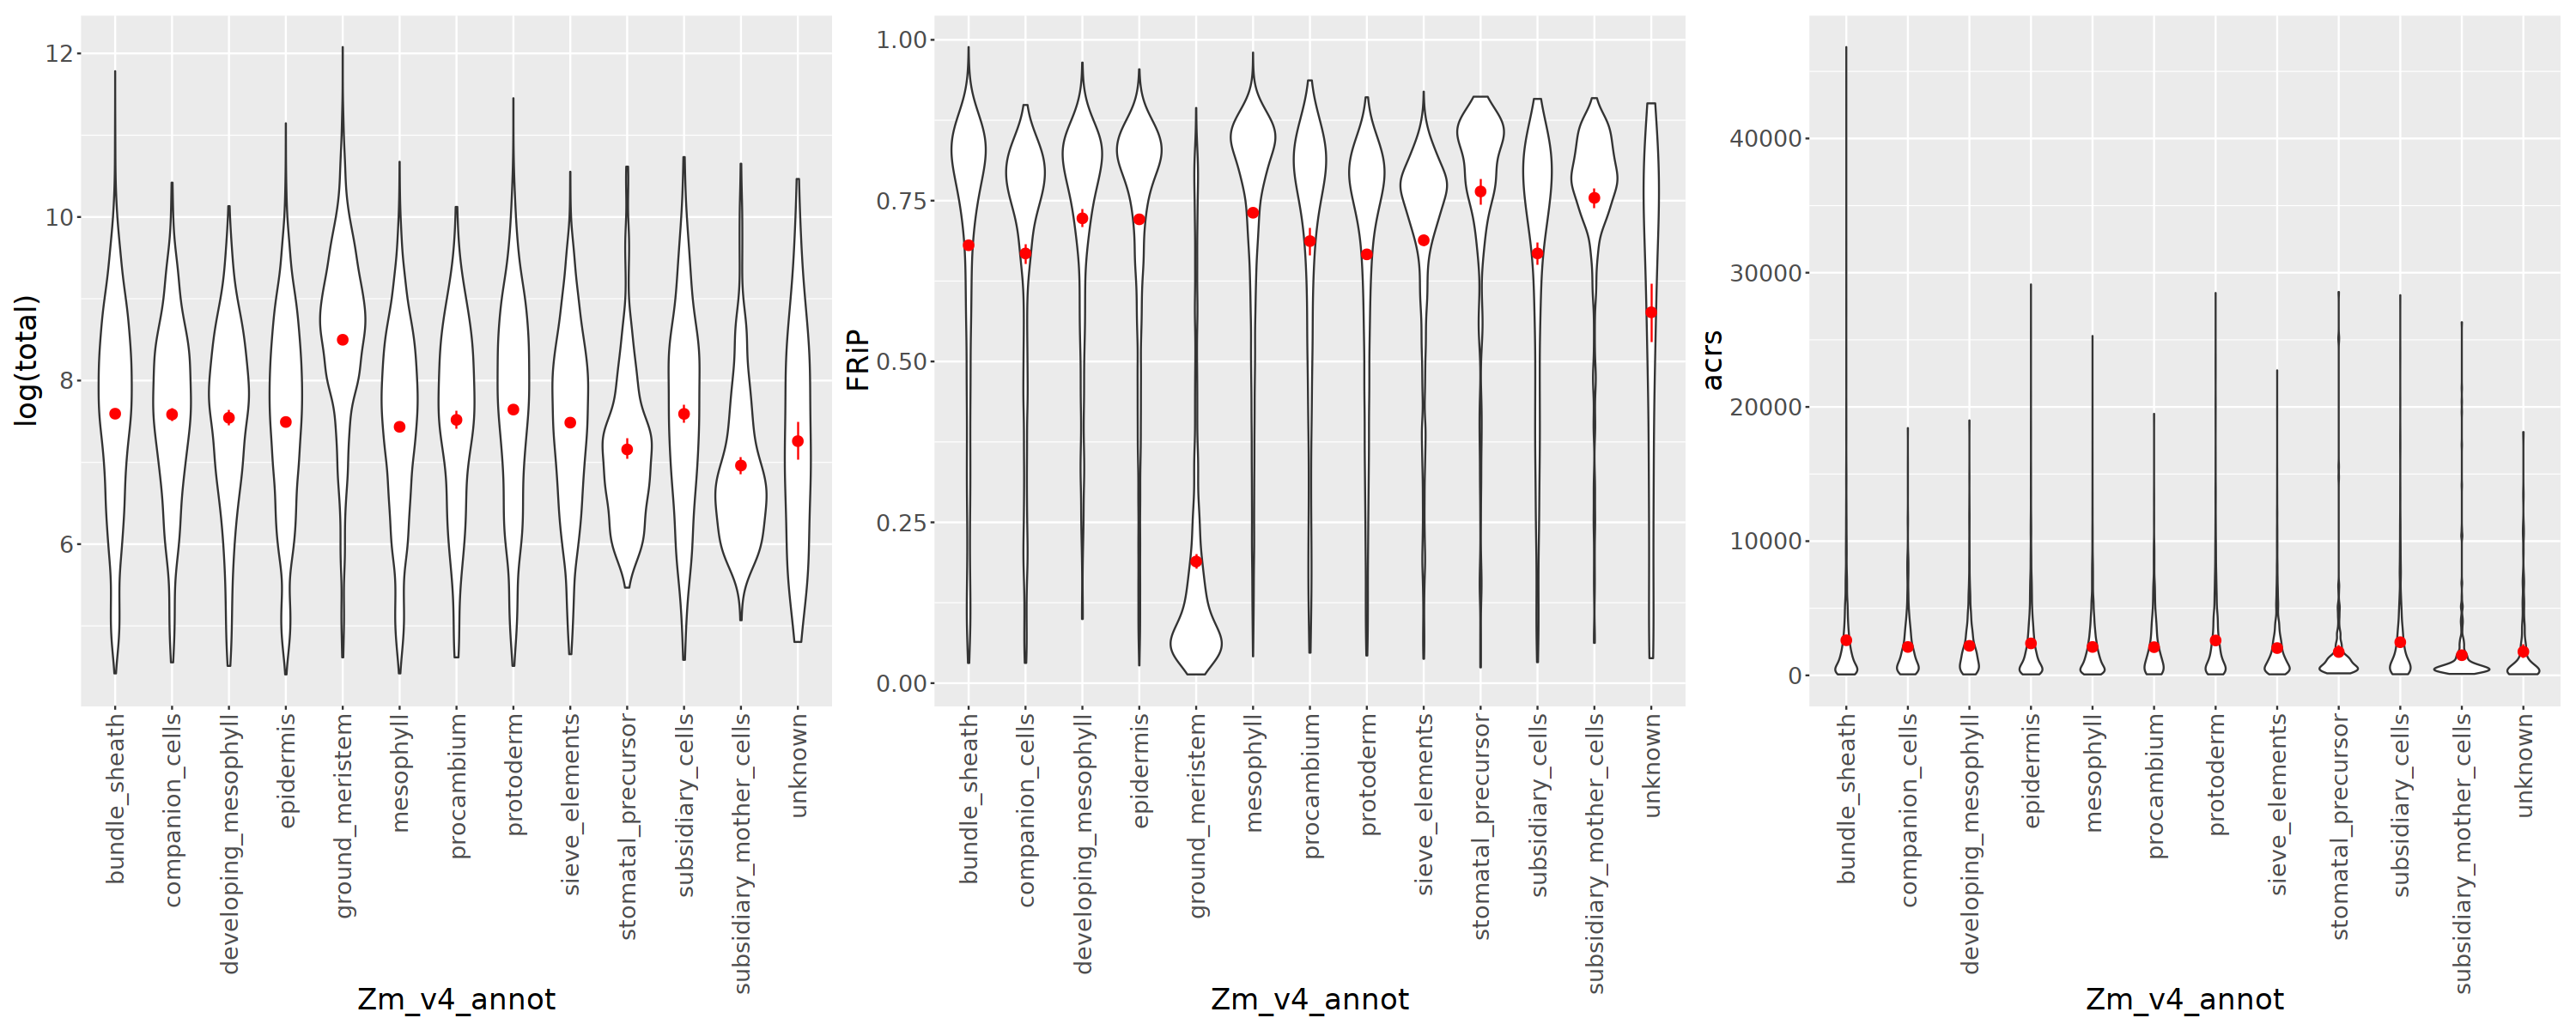

In [19]:
library(patchwork)

options(repr.plot.width=25, repr.plot.height=10)
zm_total + zm_Frip + zm_ptmt

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”

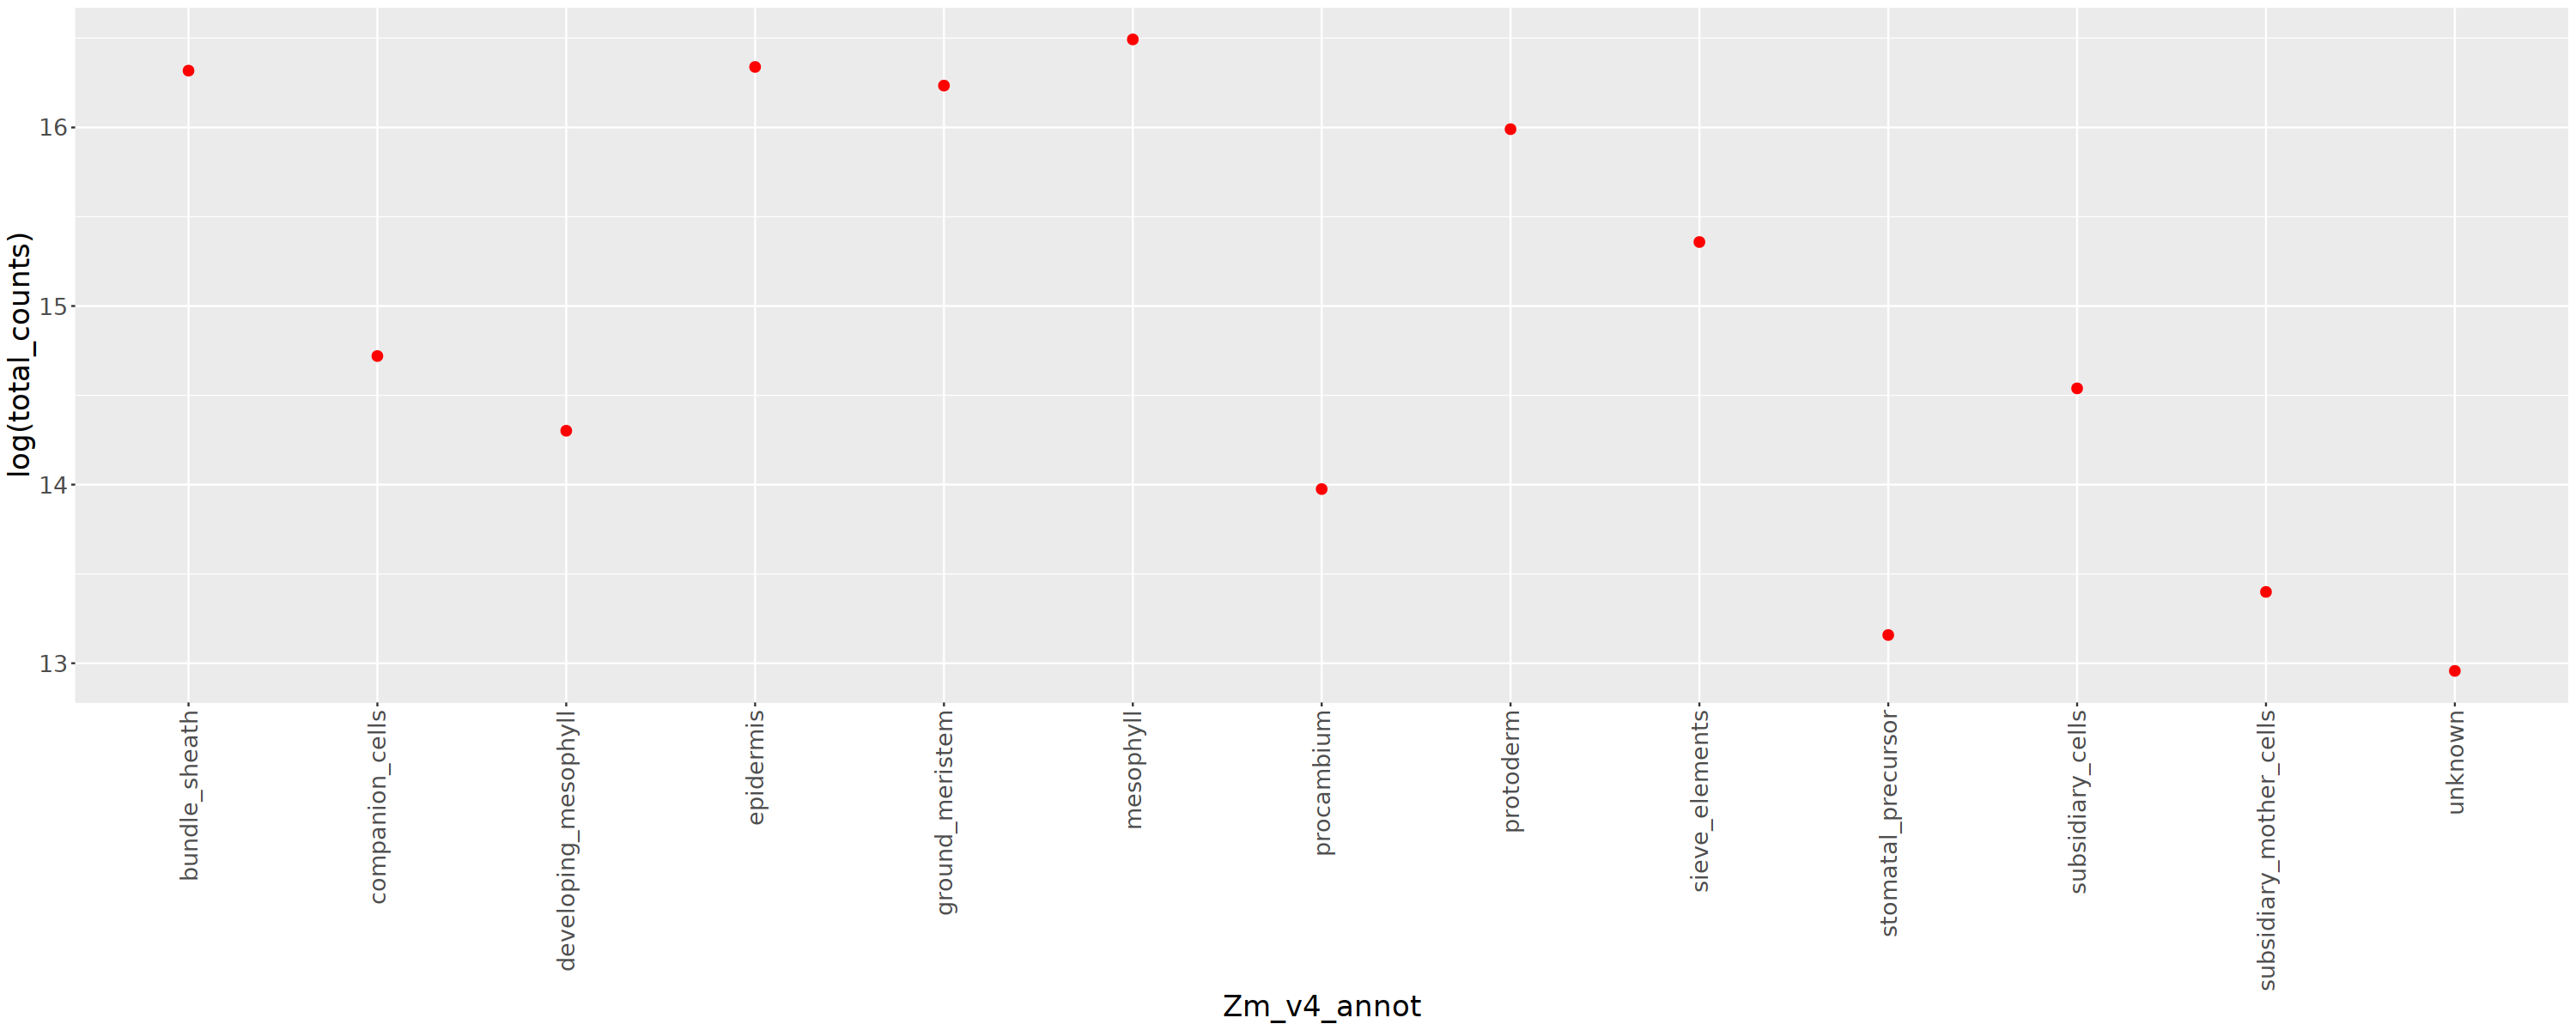

In [20]:
zm_metadata  %>% 
    group_by(Zm_v4_annot)  %>% 
    summarise(total_counts = sum(total))  %>% 
    ggplot(., aes(x = Zm_v4_annot, y = log(total_counts))) + geom_violin() +
    theme(text = element_text(size = 20)) +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
  stat_summary(fun.data = "mean_cl_boot", geom = "pointrange",
               colour = "red")


# Generating Ven_Diagrams for Overlaps

Rows: 1 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): both, CNSs, ACRs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): both, CNSs, ACRs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


INFO [2023-02-28 14:17:00] Placing category labels at default outer locations.  Use "cat.pos" and "cat.dist" to modify location.
INFO [2023-02-28 14:17:00] Current "cat.pos": 30 degrees, -30 degrees
INFO [2023-02-28 14:17:00] Current "cat.dist": 0.08 , 0.08
INFO [2023-02-28 14:17:01] Placing category labels at default outer locations.  Use "cat.pos" and "cat.dist" to modify location.
INFO [2023-02-28 14:17:01] Current "cat.pos": 30 degrees, -30 degrees
INFO [2023-02-28 14:17:01] Current "cat.dist": 0.08 , 0.08


ERROR: [1m[33mError[39m in `ggplot_add()`:[22m
[33m![39m Can't add `zm_scACR_CNS_ven` to a ggplot object.


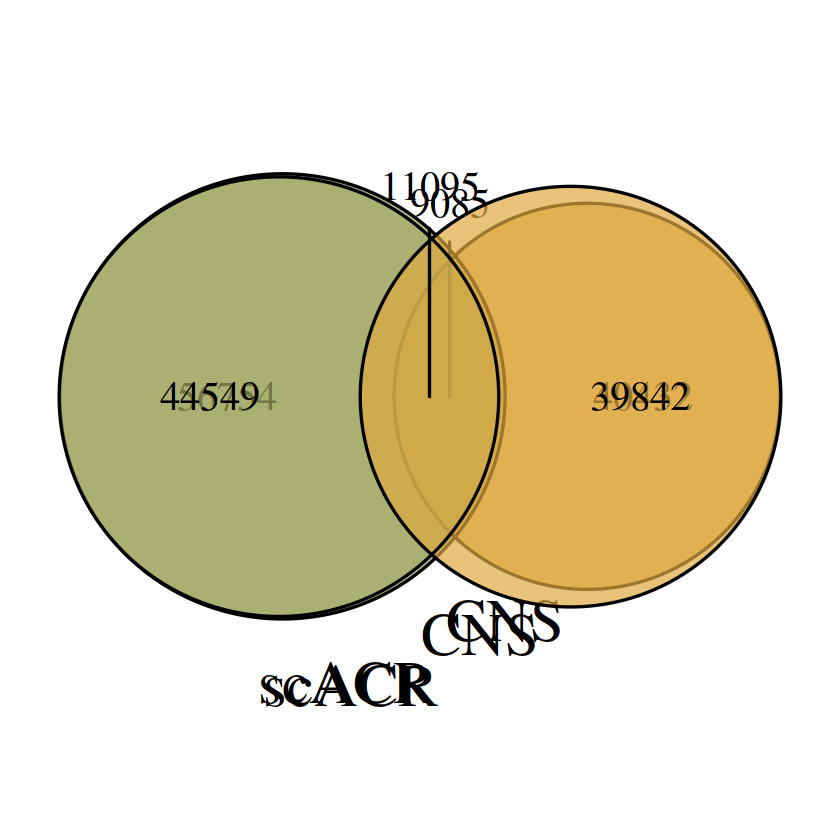

In [4]:
library(VennDiagram)
library(cowplot)

read_in_vals <- function(file_name){


  hist_mod_file <- readr::read_delim(file_name,'\t', col_names = TRUE)

  return(hist_mod_file)

}


sb_CNS_scACR_overlaps <- read_in_vals("/scratch/jpm73279/comparative_single_cell/17.analyze_cell_type_ACRs/Sb.CNS_ACR.counts.V5.txt")
zm_CNS_scACR_overlaps <- read_in_vals("/scratch/jpm73279/comparative_single_cell/17.analyze_cell_type_ACRs/Zm.CNS_ACR.counts.V5.txt")



sb_scACR_CNS_overlap <- draw.pairwise.venn(
    area1 = sb_CNS_scACR_overlaps$CNSs,
    area2 = sb_CNS_scACR_overlaps$ACRs,
    cross.area = sb_CNS_scACR_overlaps$both,
    ext.line.lty = "solid",
    fill = colors_large[1:2],
    category = c("CNS","scACR"),
    #fill = c(H3K36me3_colors, H3K4me1_colors),
    alpha = c(0.7, 0.7),
    scale = TRUE,
    ind = TRUE,
    cex = 2, #Size of the values in the diagram
    cat.cex = 3, #Size of the Titles


    #THE BELOW TWO LINES FLIP THE TEXT AND THE ORDER
    cat.pos = c(30,-30),

    cat.dist = c(0.08, 0.08),
    cat.just = list(c(0, 0), c(1, 1)),
    cat.prompts = TRUE,
    margin = 0.05,
    ext.text = TRUE, #If small as area, place labe outside
    ext.percent = .4, #If small as area, place labe outside
    ext.dist = -.2,
    ext.length = 0.8,
    ext.line.lwd = 2,
    ext.pos = c(0,0))


sb_scACR_CNS_ven <- ggdraw(sb_scACR_CNS_overlap) + theme(plot.background = element_rect(fill = NA),plot.margin = margin(12, 12, 12, 12))



zm_scACR_CNS_overlap <- draw.pairwise.venn(
    area1 = zm_CNS_scACR_overlaps$CNSs,
    area2 = zm_CNS_scACR_overlaps$ACRs,
    cross.area = zm_CNS_scACR_overlaps$both,
    ext.line.lty = "solid",
    fill = colors_large[1:2],
    category = c("CNS","scACR"),
    #fill = c(H3K36me3_colors, H3K4me1_colors),
    alpha = c(0.7, 0.7),
    scale = TRUE,
    ind = TRUE,
    cex = 2, #Size of the values in the diagram
    cat.cex = 3, #Size of the Titles


    #THE BELOW TWO LINES FLIP THE TEXT AND THE ORDER
    cat.pos = c(30,-30),

    cat.dist = c(0.08, 0.08),
    cat.just = list(c(0, 0), c(1, 1)),
    cat.prompts = TRUE,
    margin = 0.05,
    ext.text = TRUE, #If small as area, place labe outside
    ext.percent = .4, #If small as area, place labe outside
    ext.dist = -.2,
    ext.length = 0.8,
    ext.line.lwd = 2,
    ext.pos = c(0,0))


zm_scACR_CNS_ven <- ggdraw(zm_scACR_CNS_overlap) + theme(plot.background = element_rect(fill = NA),plot.margin = margin(12, 12, 12, 12))




sb_scACR_CNS_ven + zm_scACR_CNS_ven 

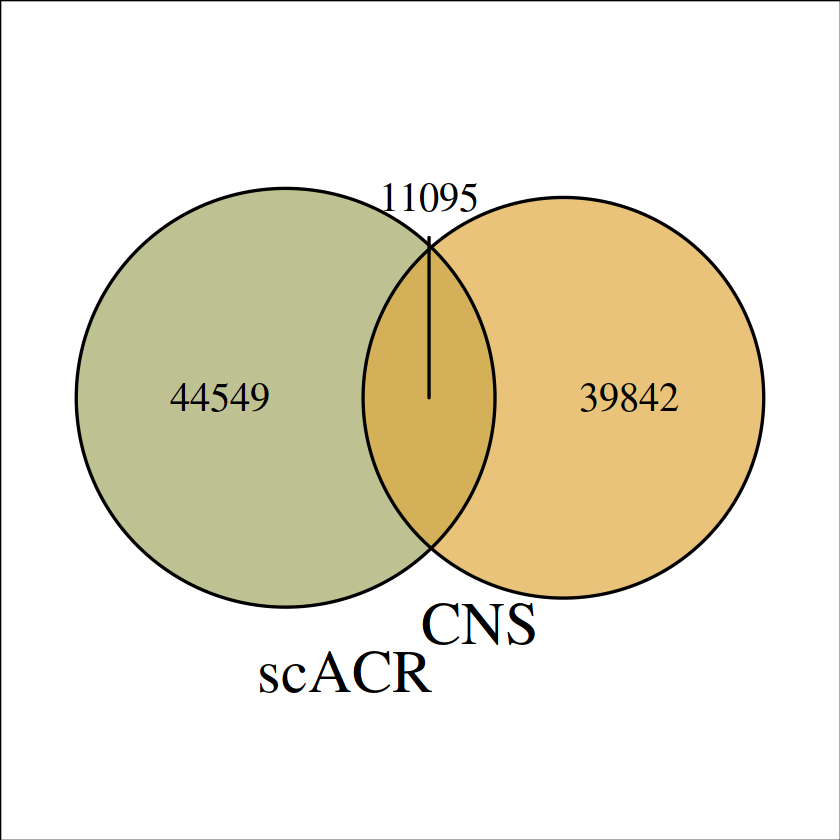

In [6]:
zm_scACR_CNS_ven

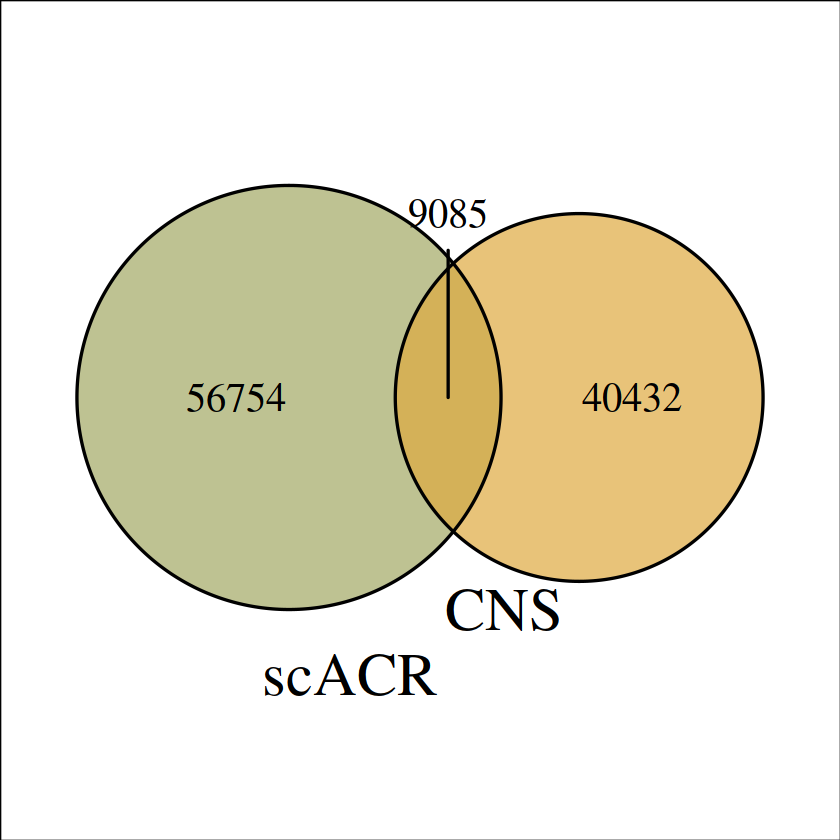

In [7]:
sb_scACR_CNS_ven 

In [8]:
sb_cols <- c("cns_chrom", "cns_start", "cns_stop", "cns_ID", "acr_chrom", "acr_start", "acr_stop", "acr_acc", "acr_id", "pval", "overlap")
sb_CNS_ACR_overlap <- read_delim("/scratch/jpm73279/comparative_single_cell/17.analyze_cell_type_ACRs/Sb_CNS_ACR_overlap.txt", delim="\t", col_names = sb_cols)  %>% 
    mutate(species = "sb")
zm_CNS_ACR_overlap <- read_delim("/scratch/jpm73279/comparative_single_cell/17.analyze_cell_type_ACRs/Zm_CNS_ACR_overlap.txt", delim="\t", col_names = sb_cols)  %>% 
    mutate(species = "zm")


Zm_Sb_CNS_ACR_overlaps <- bind_rows(sb_CNS_ACR_overlap, zm_CNS_ACR_overlap)

Rows: 49526 Columns: 10
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): cns_chrom, cns_ID, acr_chrom, acr_acc, acr_id
dbl (5): cns_start, cns_stop, acr_start, acr_stop, pval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 50971 Columns: 10
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): cns_chrom, cns_ID, acr_chrom, acr_acc, acr_id
dbl (5): cns_start, cns_stop, acr_start, acr_stop, pval

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [26]:
head(Zm_Sb_CNS_ACR_overlaps)

cns_chrom,cns_start,cns_stop,cns_ID,acr_chrom,acr_start,acr_stop,acr_acc,acr_id,pval,species
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
Chr02,67312844,67312852,CNS_30,.,-1,-1,.,.,0,sb
Chr01,81258888,81258974,CNS_31,.,-1,-1,.,.,0,sb
Chr01,81258979,81258993,CNS_32,.,-1,-1,.,.,0,sb
Chr06,52052505,52052514,CNS_33,.,-1,-1,.,.,0,sb
Chr06,52052529,52052539,CNS_34,.,-1,-1,.,.,0,sb
Chr02,25776913,25777054,CNS_35,.,-1,-1,.,.,0,sb


In [35]:
Zm_Sb_CNS_ACR_overlaps.filtered <- Zm_Sb_CNS_ACR_overlaps  %>% 
    dplyr::filter(acr_chrom != ".")  %>% 
    separate(acr_acc, c("acr_id", "cell_type"), sep = ";")  %>% 
    mutate(count = str_count(cell_type, pattern = ",")) %>%
    mutate(cell_type = case_when(count >= 1 ~ "cell_type_restricted",
                                TRUE ~ cell_type))



`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.


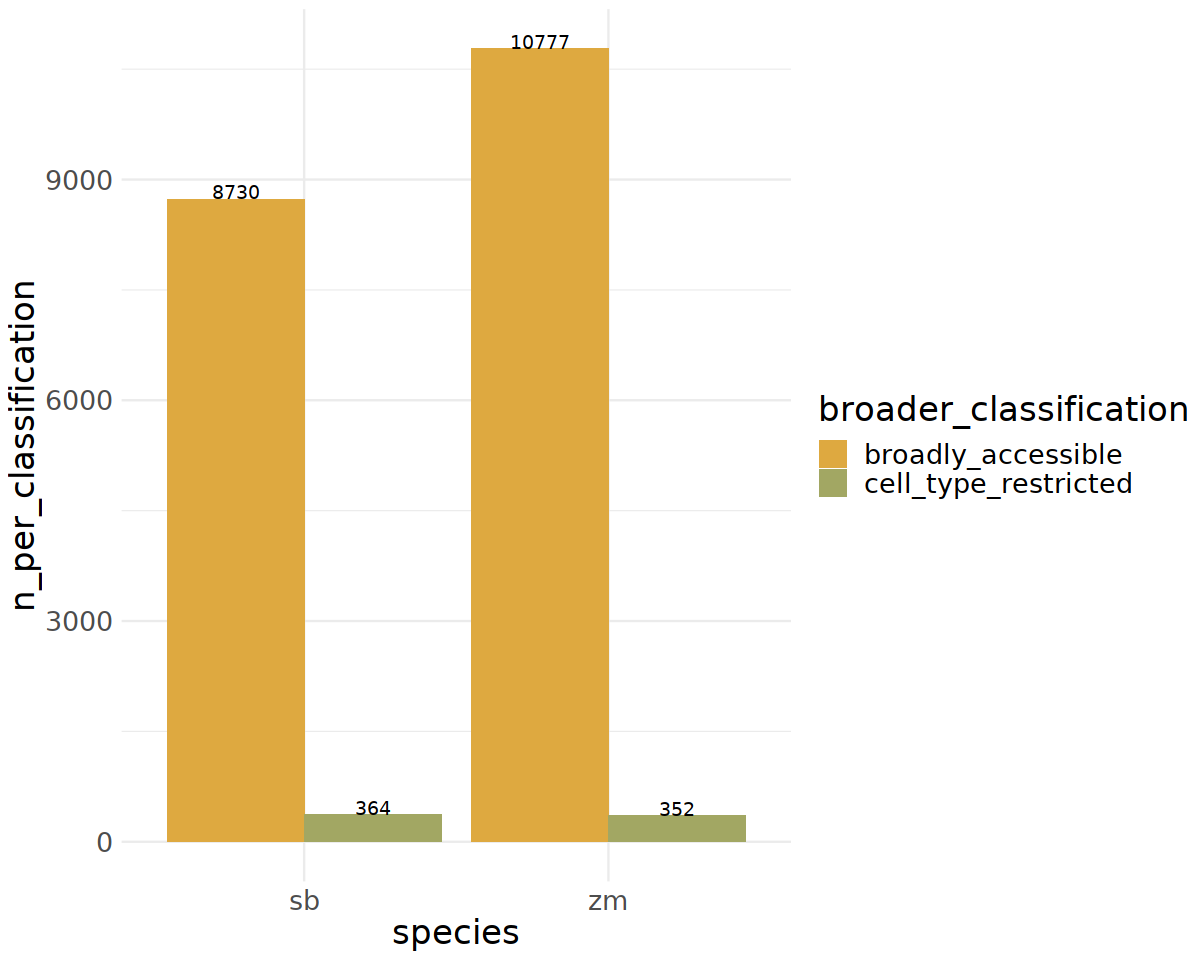

In [37]:

options(repr.plot.width=10, repr.plot.height=8)
Zm_Sb_CNS_ACR_overlaps.filtered  %>% 
    mutate(broader_classification = case_when(cell_type == "broadly_accessible" ~ "broadly_accessible", 
                                             TRUE ~ "cell_type_restricted"))  %>% 
    group_by(species, broader_classification)  %>% 
    summarise(n_per_classification = n()) %>% 
    ggplot(., aes(x = species, y = n_per_classification, fill = broader_classification)) +
        geom_bar(stat="identity", position=position_dodge()) +
    geom_text(aes(label=n_per_classification), vjust=0, color="black",
            position = position_dodge(0.9))+
            scale_fill_manual(values = colors_large) +
            theme_minimal() + theme(text = element_text(size = 20))

`summarise()` has grouped output by 'species'. You can override using the `.groups` argument.


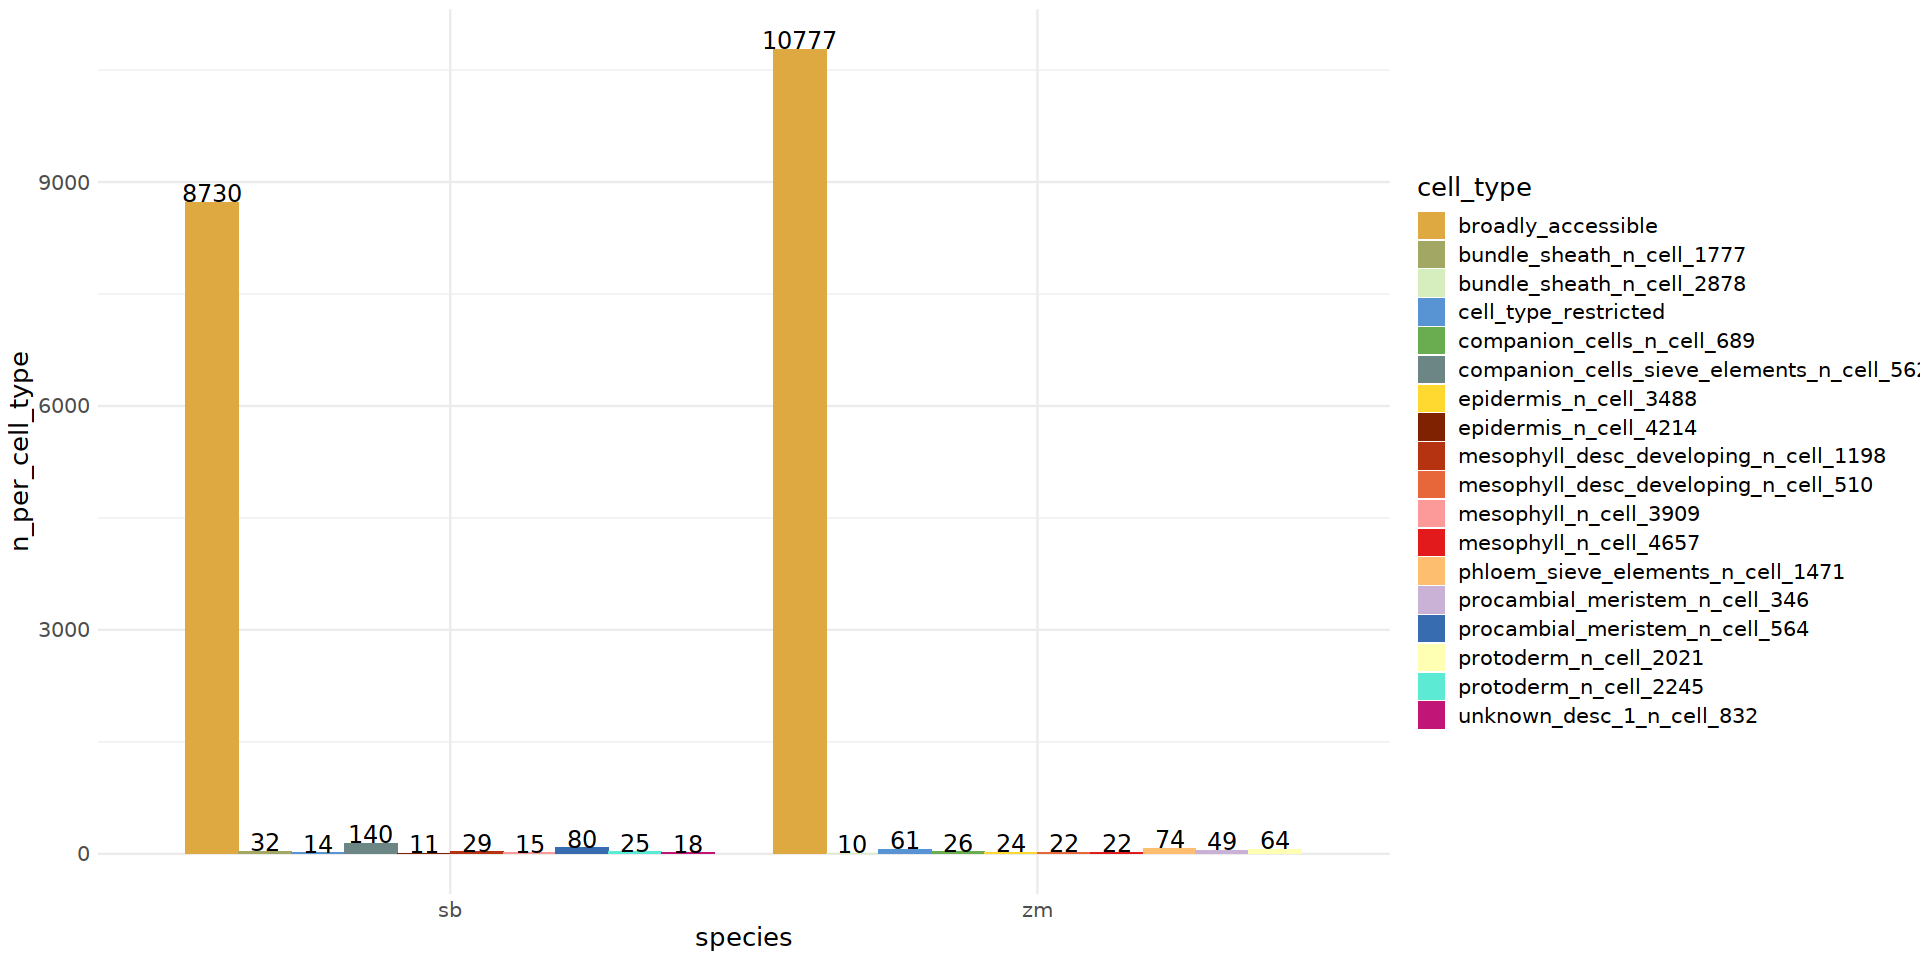

In [38]:

options(repr.plot.width=16, repr.plot.height=8)


Zm_Sb_CNS_ACR_overlaps.filtered  %>% 
    group_by(species, cell_type)  %>% 
    summarise(n_per_cell_type = n()) %>% 
    ggplot(., aes(x = species, y = n_per_cell_type, fill = cell_type)) +
        geom_bar(stat="identity", position=position_dodge()) +
    geom_text(aes(label=n_per_cell_type), vjust=0, color="black",
            position = position_dodge(0.9), size=5) +
            scale_fill_manual(values = colors_large) +
            theme_minimal() + theme(text = element_text(size = 15))


In [39]:
Zm_Sb_CNS_ACR_overlaps.filtered  %>% 
    group_by(species)  %>% 
    summarise(n_per_cell_type = n()) 

species,n_per_cell_type
<chr>,<int>
sb,9094
zm,11129


In [40]:
library(ggsankey)

In [41]:
Zm_Sb_CNS_ACR_overlaps.filtered

cns_chrom,cns_start,cns_stop,cns_ID,acr_chrom,acr_start,acr_stop,acr_id,cell_type,pval,species,count
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<int>
Chr01,799568,799616,CNS_113,Chr01,799208,799709,scACR_129,broadly_accessible,48,sb,0
Chr01,799696,799727,CNS_114,Chr01,799208,799709,scACR_129,broadly_accessible,13,sb,0
Chr01,948065,948084,CNS_159,Chr01,947833,948334,scACR_166,broadly_accessible,19,sb,0
Chr01,948084,948122,CNS_160,Chr01,947833,948334,scACR_166,broadly_accessible,38,sb,0
Chr01,971095,971127,CNS_169,Chr01,970740,971241,scACR_172,broadly_accessible,32,sb,0
Chr01,971127,971149,CNS_170,Chr01,970740,971241,scACR_172,broadly_accessible,22,sb,0
Chr01,1175068,1175099,CNS_174,Chr01,1174897,1175398,scACR_228,broadly_accessible,31,sb,0
Chr01,1182653,1182679,CNS_191,Chr01,1182229,1182730,scACR_230,broadly_accessible,26,sb,0
Chr01,1183740,1183787,CNS_193,Chr01,1183478,1183979,scACR_231,broadly_accessible,47,sb,0


In [42]:
x <- Zm_Sb_CNS_ACR_overlaps.filtered  %>% 
    select(cns_ID, cell_type, species)

zm_cts_cns <- x  %>% 
    dplyr::filter(species == "zm")  %>% 
    dplyr::rename(zm_cell_type = cell_type)  %>% 
    dplyr::select(-species)
 
sb_cts_cns <- x %>% 
    dplyr::filter(species == "sb")  %>% 
    dplyr::rename(sb_cell_type = cell_type)  %>% 
    dplyr::select(-species)

In [43]:
sb_cts_cns

cns_ID,sb_cell_type
<chr>,<chr>
CNS_113,broadly_accessible
CNS_114,broadly_accessible
CNS_159,broadly_accessible
CNS_160,broadly_accessible
CNS_169,broadly_accessible
CNS_170,broadly_accessible
CNS_174,broadly_accessible
CNS_191,broadly_accessible
CNS_193,broadly_accessible


In [44]:
sum(zm_cts_cns$cns_ID %in% sb_cts_cns$cns_ID)
sum(sb_cts_cns$cns_ID %in% zm_cts_cns$cns_ID )

[1] 4144

[1] 4136

In [45]:
full_join(zm_cts_cns, sb_cts_cns, by = c("cns_ID"))  %>% 
    replace(is.na(.), "None")  %>% 
    group_by(zm_cell_type, sb_cell_type)  %>% 
    summarise(counts = n()) 


yy <- full_join(zm_cts_cns, sb_cts_cns, by = c("cns_ID"))  %>% 
    replace(is.na(.), "None")  %>% 
    group_by(zm_cell_type, sb_cell_type)  %>% 
    summarise(counts = n()) 


`summarise()` has grouped output by 'zm_cell_type'. You can override using the `.groups` argument.


zm_cell_type,sb_cell_type,counts
<chr>,<chr>,<int>
broadly_accessible,broadly_accessible,3911
broadly_accessible,bundle_sheath_n_cell_1777,10
broadly_accessible,cell_type_restricted,4
broadly_accessible,companion_cells_sieve_elements_n_cell_562,51
broadly_accessible,epidermis_n_cell_4214,1
broadly_accessible,mesophyll_desc_developing_n_cell_1198,3
broadly_accessible,mesophyll_n_cell_3909,4
broadly_accessible,None,6762
broadly_accessible,procambial_meristem_n_cell_564,17


`summarise()` has grouped output by 'zm_cell_type'. You can override using the `.groups` argument.


Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


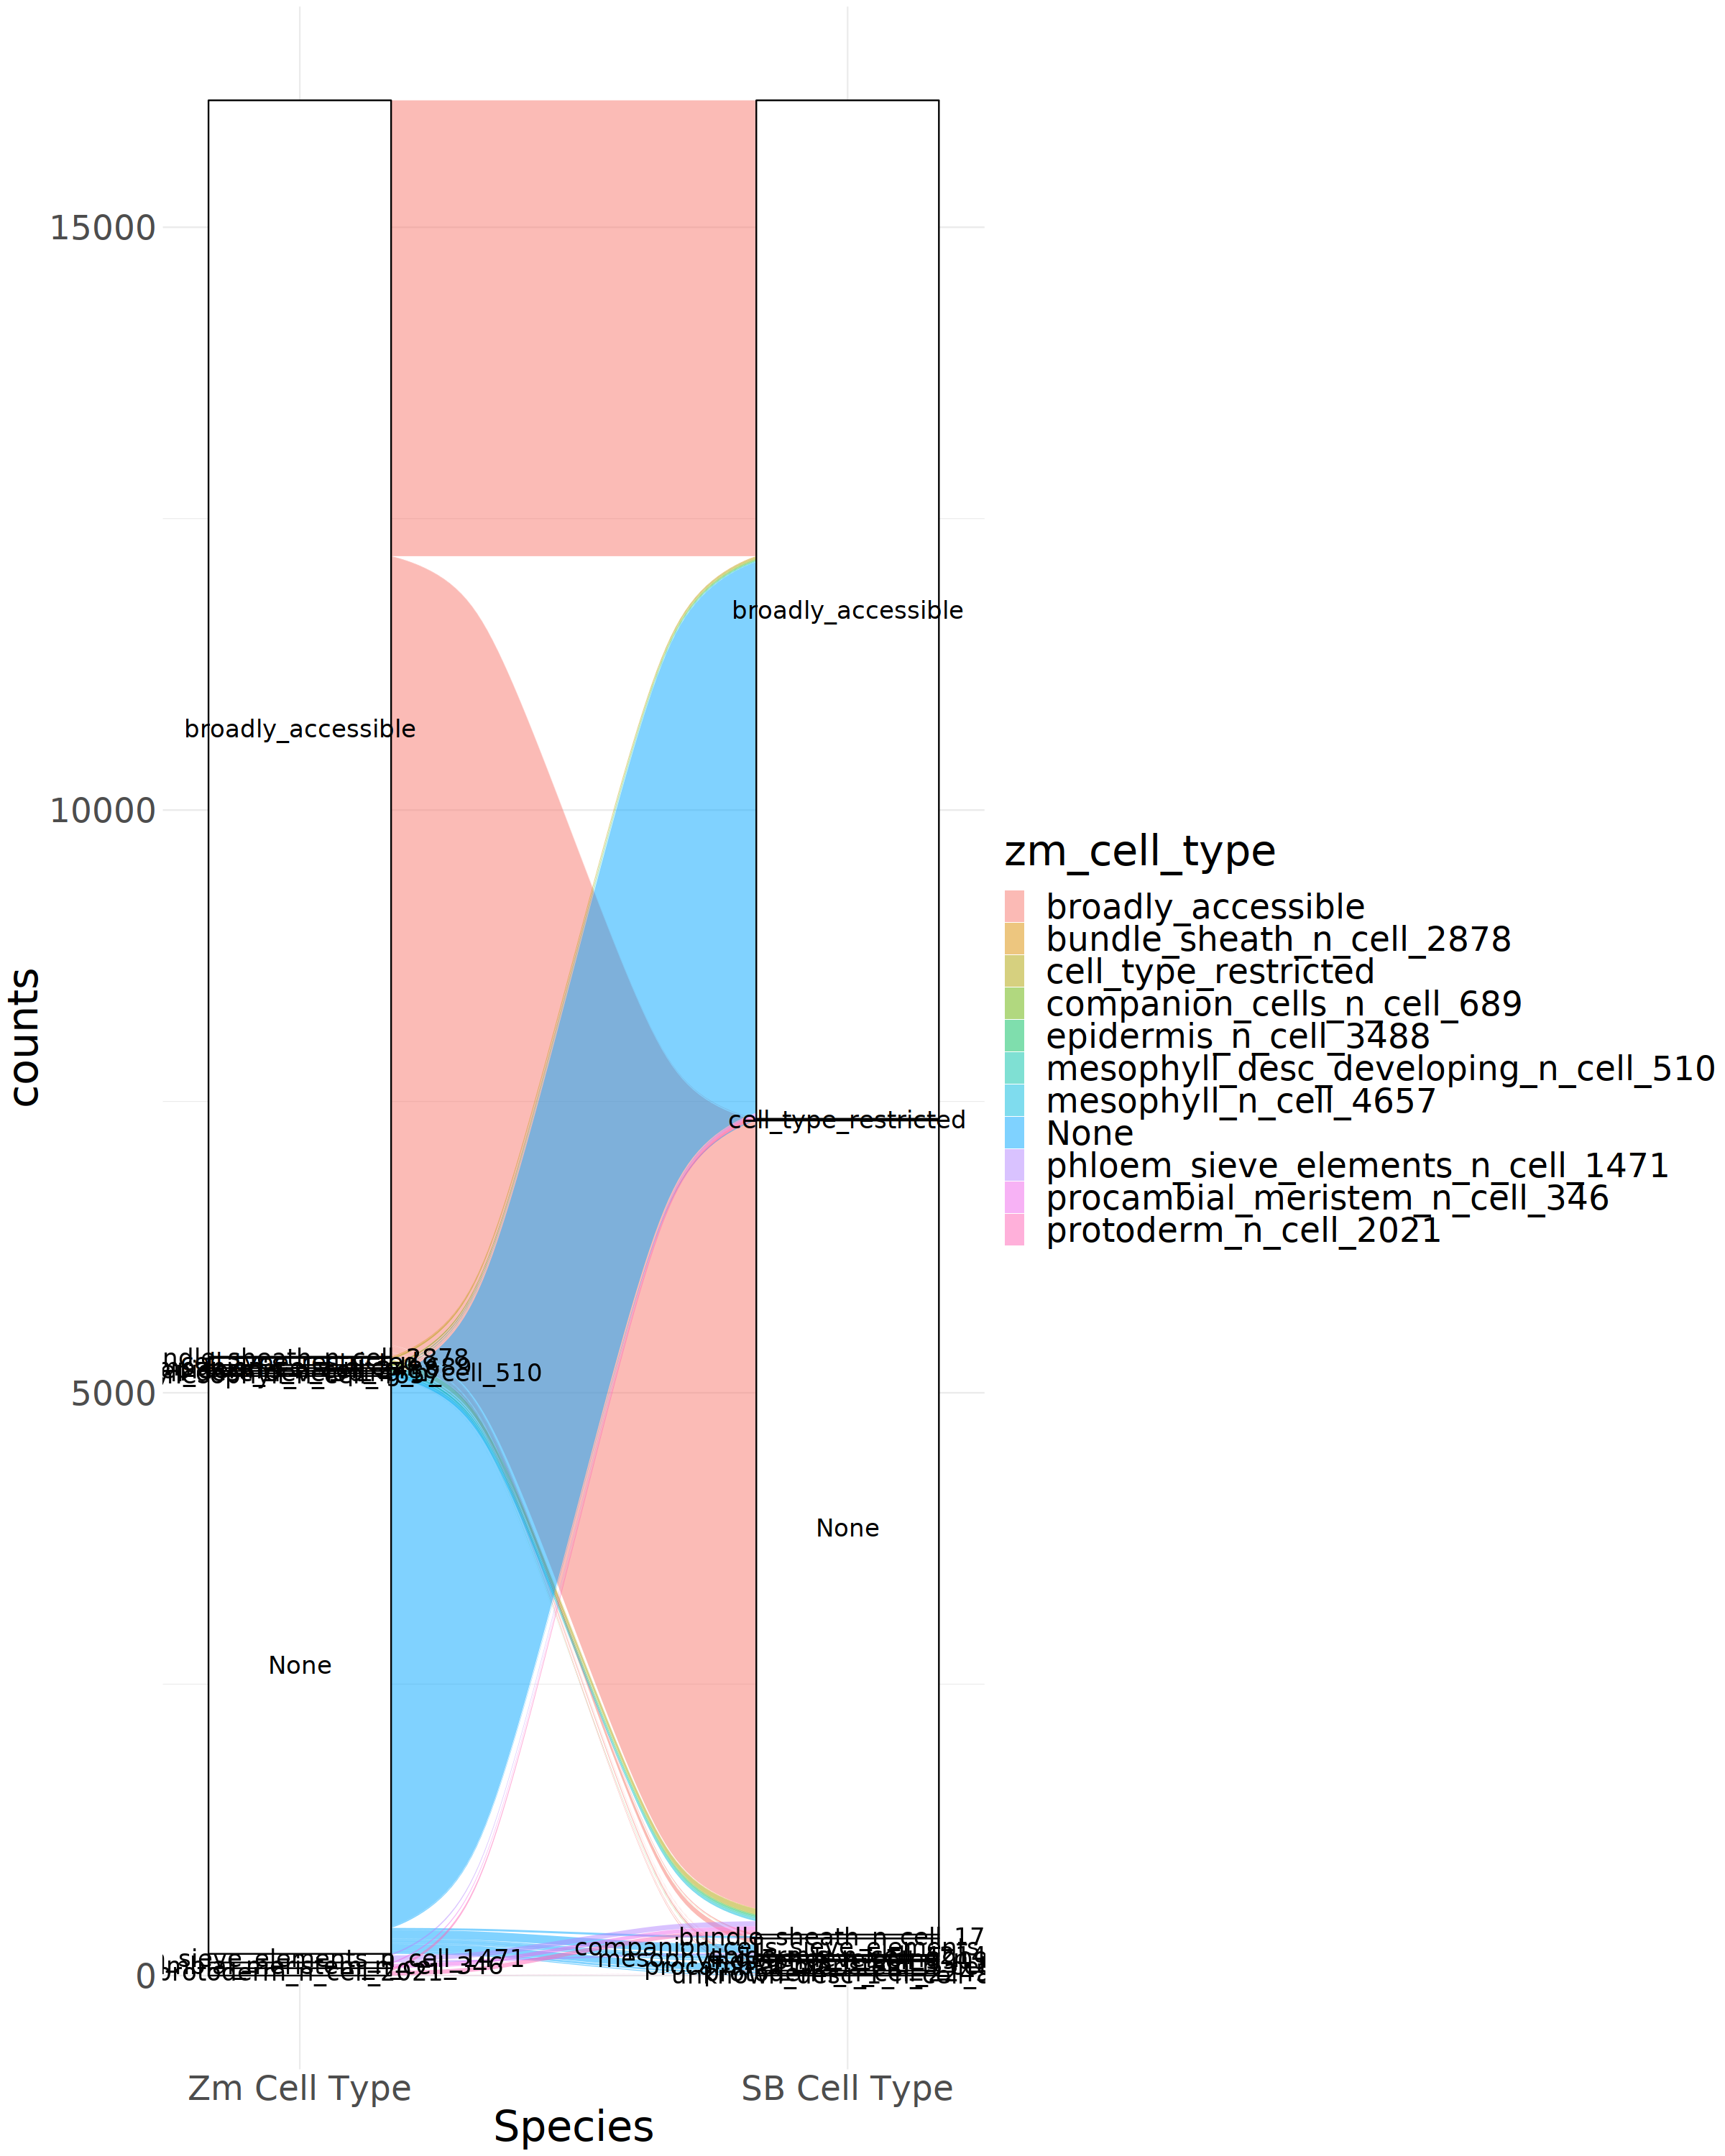

In [46]:

library(ggalluvial)


options(repr.plot.width=20, repr.plot.height=25)
ggplot(data = yy,
       aes(axis1 = zm_cell_type, axis2 = sb_cell_type,
           y = counts)) +
  scale_x_discrete(limits = c("Zm Cell Type", "SB Cell Type"), expand = c(.2, .05)) +
  xlab("Species") +
  geom_alluvium(aes(fill = zm_cell_type)) +
  geom_stratum() +
  geom_text(size=7, stat = "stratum", aes(label = after_stat(stratum))) +
  theme_minimal() + theme(text = element_text(size = 35))


Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


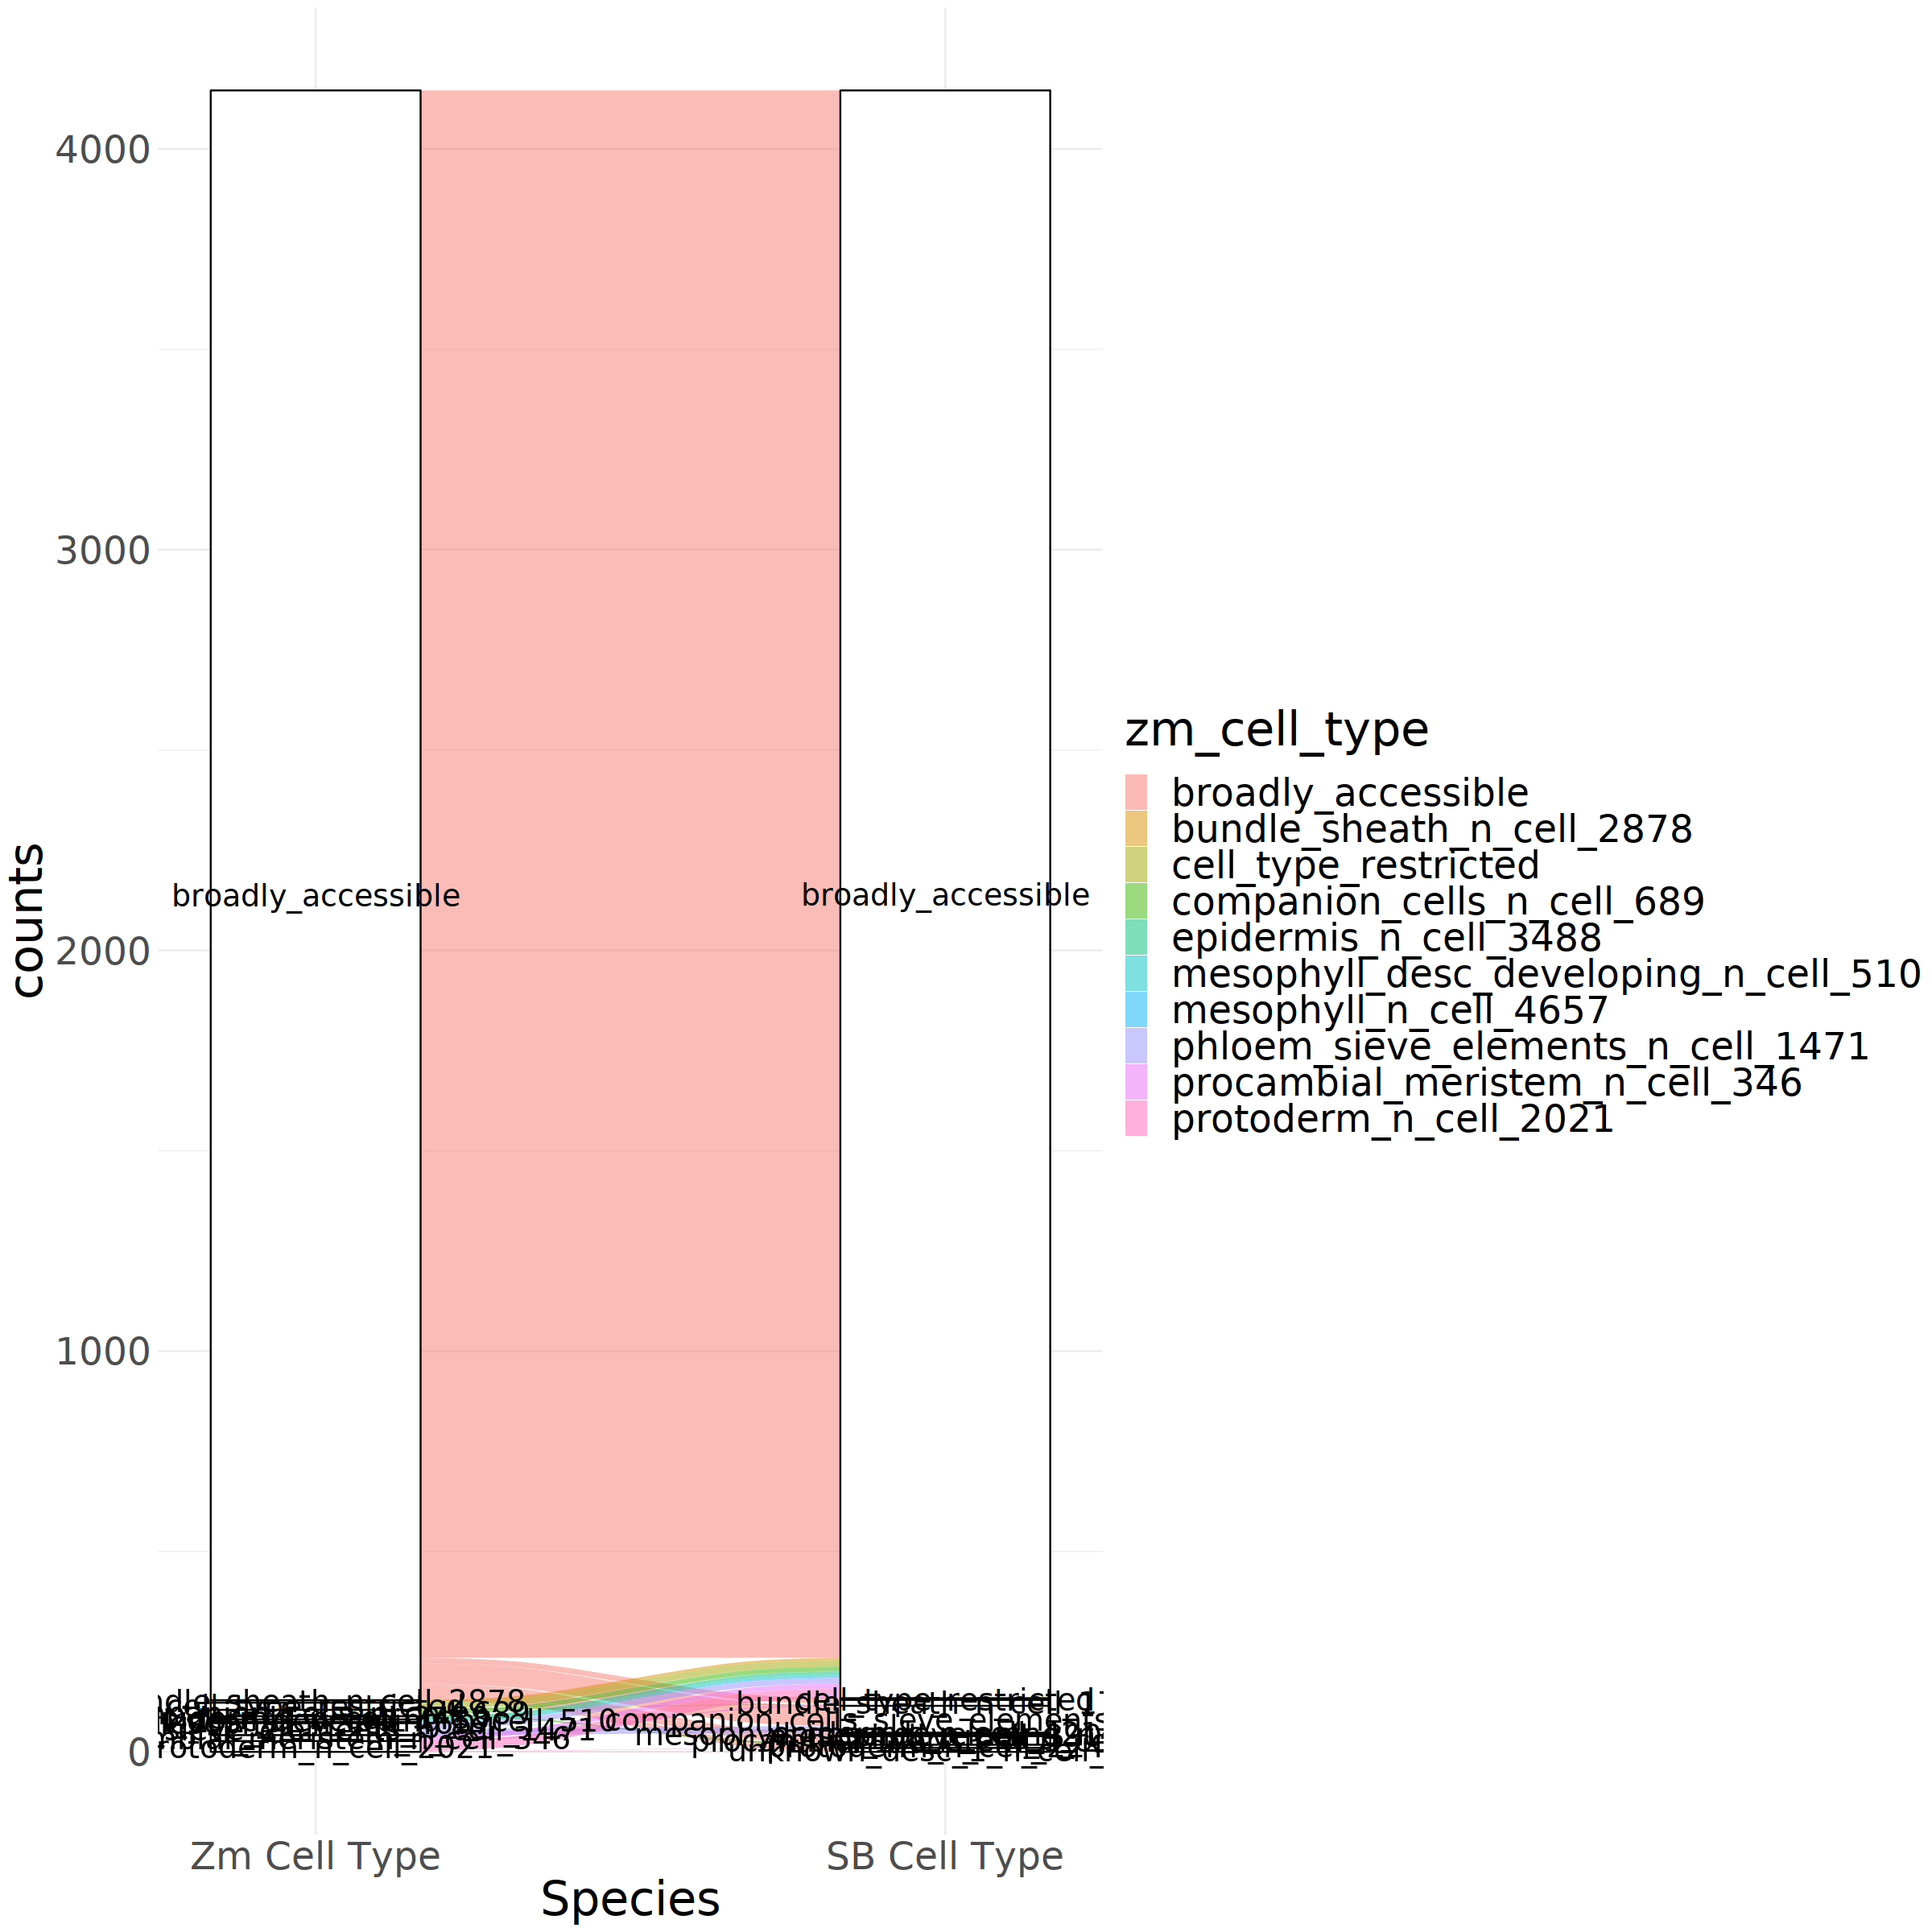

In [47]:

library(ggalluvial)


options(repr.plot.width=20, repr.plot.height=20) 
yy  %>% 
    dplyr::filter(zm_cell_type != "None")  %>% 
    dplyr::filter(sb_cell_type != "None")  %>% 
    ggplot(.,
       aes(axis1 = zm_cell_type, axis2 = sb_cell_type,
           y = counts)) +
  scale_x_discrete(limits = c("Zm Cell Type", "SB Cell Type"), expand = c(.2, .05)) +
   xlab("Species") +
  geom_alluvium(aes(fill = zm_cell_type)) +
  geom_stratum() +
  geom_text(size=8, stat = "stratum", aes(label = after_stat(stratum))) +
  theme_minimal() + theme(text = element_text(size = 35))


Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”
Warning message in to_lodes_form(data = data, axes = axis_ind, discern = params$discern):
“Some strata appear at multiple axes.”


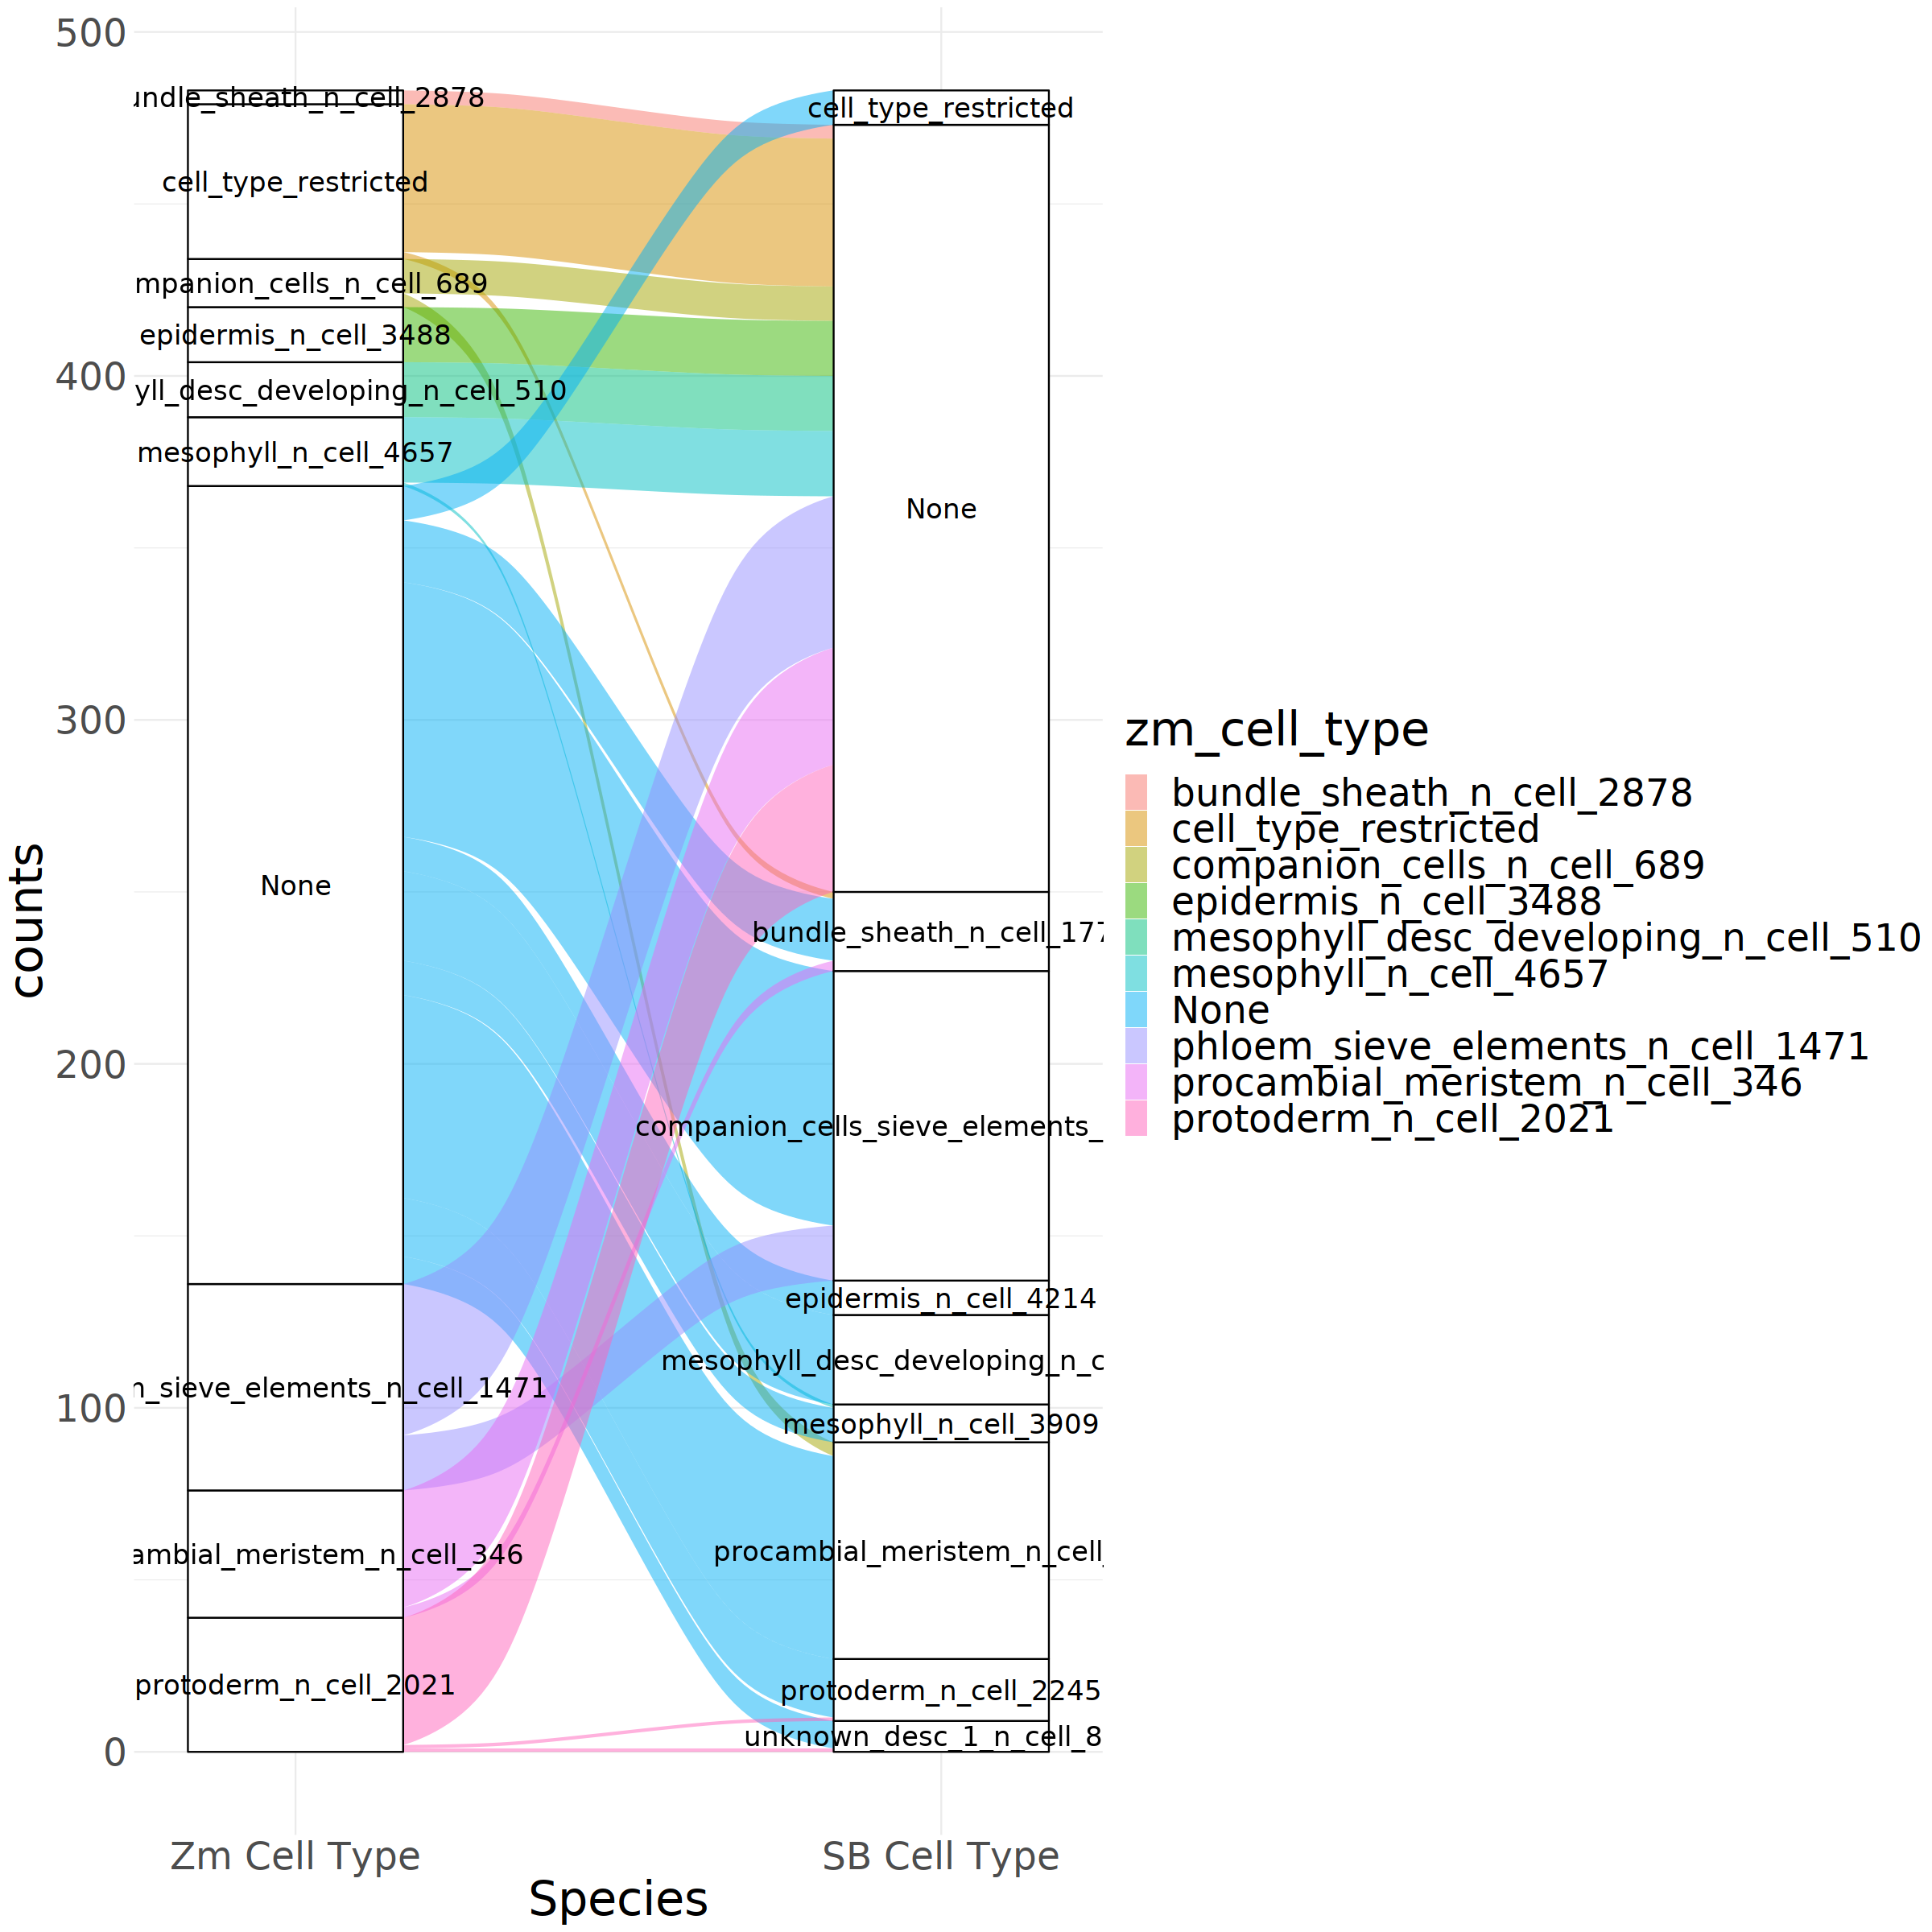

In [49]:

library(ggalluvial)


options(repr.plot.width=20, repr.plot.height=20) 
yy  %>% 
    #dplyr::filter(zm_cell_type != "None")  %>% 
    dplyr::filter(zm_cell_type != "broadly_accessible" & sb_cell_type != "broadly_accessible")  %>% 
    #dplyr::filter(sb_cell_type != "None")  %>% 
    ggplot(.,
       aes(axis1 = zm_cell_type, axis2 = sb_cell_type,
           y = counts)) +
  scale_x_discrete(limits = c("Zm Cell Type", "SB Cell Type"), expand = c(.2, .05)) +
  xlab("Species") +
  geom_alluvium(aes(fill = zm_cell_type)) +
  geom_stratum() +
  geom_text(size=7, stat = "stratum", aes(label = after_stat(stratum))) +
  theme_minimal() + theme(text = element_text(size = 35))


In [36]:
Zm_Sb_CNS_ACR_overlaps.filtered

cns_chrom,cns_start,cns_stop,cns_ID,acr_chrom,acr_start,acr_stop,acr_acc,acr_id,cell_type,pval,overlap,species
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Chr01,799568,799616,CNS_113,Chr01,799270,799771,NA,scACR_134,phloem,0.007248,48,sb
Chr01,799696,799727,CNS_114,Chr01,799270,799771,NA,scACR_134,phloem,0.007248,31,sb
Chr01,948065,948084,CNS_159,Chr01,947833,948334,8.577418109752374,scACR_171,broadly_accessible,NA,19,sb
Chr01,948084,948122,CNS_160,Chr01,947833,948334,8.577418109752374,scACR_171,broadly_accessible,NA,38,sb
Chr01,971095,971127,CNS_169,Chr01,970726,971227,1.1471927810504958,scACR_177,broadly_accessible,NA,32,sb
Chr01,971127,971149,CNS_170,Chr01,970726,971227,1.1471927810504958,scACR_177,broadly_accessible,NA,22,sb
Chr01,1175068,1175099,CNS_174,Chr01,1174912,1175413,43.52696585432734,scACR_228,broadly_accessible,NA,31,sb
Chr01,1182653,1182679,CNS_191,Chr01,1182230,1182731,NA,scACR_230,epidermis,2.32e-4,26,sb
Chr01,1182653,1182679,CNS_191,Chr01,1182230,1182731,NA,scACR_230,protoderm,0.006874,26,sb


In [60]:
CNS_ACR_occuring_twice <- Zm_Sb_CNS_ACR_overlaps.filtered  %>% 
    dplyr::select(cns_ID, acr_chrom, acr_start, acr_stop, cell_type, species)  %>% 
    dplyr::group_by(cns_ID, species) %>%
    dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
    dplyr::filter(n > 1L)  


`%ni%` <- Negate(`%in%`)
Zm_Sb_CNS_ACR_overlaps_filtered_reformat <-  Zm_Sb_CNS_ACR_overlaps.filtered  %>% 
    dplyr::filter(cns_ID %ni% CNS_ACR_occuring_twice$cns_ID)  %>% 
    pivot_wider(id_cols = cns_ID, names_from = species, 
                values_from = c(acr_chrom, acr_start, acr_stop, cell_type),
                 names_glue = "{species}_{.value}")  


Zm_Sb_CNS_ACR_overlaps_filtered_reformat_arranged <- Zm_Sb_CNS_ACR_overlaps_filtered_reformat %>% 
    dplyr::select(cns_ID, sb_cell_type, zm_cell_type,sb_acr_chrom,  sb_acr_start, sb_acr_stop,
                  zm_acr_chrom, zm_acr_start, zm_acr_stop)





In [61]:
Zm_Sb_CNS_ACR_overlaps.filtered  %>% 
    dplyr::filter(cns_ID %in% test$cns_ID)

cns_chrom,cns_start,cns_stop,cns_ID,acr_chrom,acr_start,acr_stop,acr_acc,acr_id,cell_type,pval,overlap,species
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Chr01,1182653,1182679,CNS_191,Chr01,1182230,1182731,NA,scACR_230,epidermis,2.32e-4,26,sb
Chr01,1182653,1182679,CNS_191,Chr01,1182230,1182731,NA,scACR_230,protoderm,0.006874,26,sb
Chr01,2768521,2768571,CNS_721,Chr01,2768174,2768675,3.890232993719746,scACR_633,broadly_accessible,NA,50,sb
Chr01,4492351,4492387,CNS_1131,Chr01,4491991,4492492,NA,scACR_1021,companion_cells_sieve_elements,0,36,sb
Chr01,4492351,4492387,CNS_1131,Chr01,4491991,4492492,NA,scACR_1021,phloem,0.007056,36,sb
Chr01,77857302,77857324,CNS_1497,Chr01,77857058,77857559,NA,scACR_9688,phloem,4e-6,22,sb
Chr01,77857302,77857324,CNS_1497,Chr01,77857058,77857559,NA,scACR_9688,proto_xylem,0.002792,22,sb
Chr01,77857337,77857350,CNS_1498,Chr01,77857058,77857559,NA,scACR_9688,phloem,4e-6,13,sb
Chr01,77857337,77857350,CNS_1498,Chr01,77857058,77857559,NA,scACR_9688,proto_xylem,0.002792,13,sb


In [62]:
Zm_Sb_CNS_ACR_overlaps_filtered_reformat_arranged

cns_ID,sb_cell_type,zm_cell_type,sb_acr_chrom,sb_acr_start,sb_acr_stop,zm_acr_chrom,zm_acr_start,zm_acr_stop
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
CNS_113,phloem,NA,Chr01,799270,799771,NA,NA,NA
CNS_114,phloem,NA,Chr01,799270,799771,NA,NA,NA
CNS_159,broadly_accessible,NA,Chr01,947833,948334,NA,NA,NA
CNS_160,broadly_accessible,NA,Chr01,947833,948334,NA,NA,NA
CNS_169,broadly_accessible,NA,Chr01,970726,971227,NA,NA,NA
CNS_170,broadly_accessible,NA,Chr01,970726,971227,NA,NA,NA
CNS_174,broadly_accessible,NA,Chr01,1174912,1175413,NA,NA,NA
CNS_193,broadly_accessible,NA,Chr01,1183478,1183979,NA,NA,NA
CNS_200,broadly_accessible,NA,Chr01,1201094,1201595,NA,NA,NA


In [81]:
filtered_sqitches_conservation <- Zm_Sb_CNS_ACR_overlaps_filtered_reformat_arranged  %>% 
    dplyr::filter(is.na(sb_cell_type) != TRUE)  %>% 
    dplyr::filter(is.na(zm_cell_type) != TRUE)  %>% 
    arrange(zm_cell_type, sb_cell_type)

filtered_sqitches_conservation

cns_ID,sb_cell_type,zm_cell_type,sb_acr_chrom,sb_acr_start,sb_acr_stop,zm_acr_chrom,zm_acr_start,zm_acr_stop
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
CNS_445,broadly_accessible,broadly_accessible,Chr01,1947640,1948141,chr1,5125957,5126458
CNS_446,broadly_accessible,broadly_accessible,Chr01,1947640,1948141,chr1,5125957,5126458
CNS_553,broadly_accessible,broadly_accessible,Chr01,2195431,2195932,chr1,5766382,5766883
CNS_554,broadly_accessible,broadly_accessible,Chr01,2195431,2195932,chr1,5766382,5766883
CNS_555,broadly_accessible,broadly_accessible,Chr01,2195431,2195932,chr1,5766382,5766883
CNS_556,broadly_accessible,broadly_accessible,Chr01,2195431,2195932,chr1,5766382,5766883
CNS_699,broadly_accessible,broadly_accessible,Chr01,2611592,2612093,chr1,7282053,7282554
CNS_700,broadly_accessible,broadly_accessible,Chr01,2611592,2612093,chr1,7282053,7282554
CNS_814,broadly_accessible,broadly_accessible,Chr01,3305456,3305957,chr1,9195133,9195634


In [82]:
write_tsv(filtered_sqitches_conservation, na = "NA", file = "/home/jpm73279/CNS_ACRs_change.tsv")

In [ ]:
q <- full_join(zm_cts_cns, sb_cts_cns, by = c("cns_ID"))  %>% 
    replace(is.na(.), "None") 